# Short-Term Rental Platform Versus Find a Long-Term Tenant: Evaluating Expected Profits

# Introduction

Short-term rental industry as of late as been a big focus for the sharing economy and local and state government. People who have been putting their dwelling (Hosts) on platforms such as AirBnB and HomeAway are able to make money by making use of empty room or perhaps their whole house or apartment on these platforms. Local and State governments are taking notice because these platforms are bypassing the local Hotel Occupancy Taxes, which hotel guests have to pay.  No doubt the Hotel Lobbyists are putting pressure like how Taxi Lobbyists put pressure on officials with Uber, Lyft and similar companies. 

Property Management companies are also using these platforms because they can generate more profit than long-term leases, depending on what areas (i.e.Santa Monica, New York City). Sharing Economy tends to create a demand bubble, causing prices to increase. Due to this reason as well as bypassing Hotel Occupancy Taxes, many local and state officials are banning listings that are entire units. Austin, Santa Monica, San Francisco all have put severe restrictions into number of days that the unit can be listed, requiring permits, and/or banned entire unit rentals. New York signed a law stating that short-term rentals that consist of entire unit is now illegal, although it is still in legal limbo. 

First analysis concentrates on if makes financial sense to get a two-bedroom, and put the extra room on a STR platform versus finding a long-term rental. This depends on the cost of the apartment and the price that room can generate on a STR platform. Location matters for both the cost of the apartment and the average price on the STR platform as both are a function of demand.


Second Analysis will concentrate on full-time rentals, concentrating on the amount the rental can generate per month minus the rent of the rental per month. Since maximum price and occupancy are affected by seasonality, they will not be constant throughout the year.

# Methodology & Data Sources

Using AirBnB data and Zillow data, I will use a machine learning algorithm to predict airbnb prices by month by neighborhood and by bedrooms to get a sense of how pricing differs by neighborhood, bedrooms and month (seasonality). Then calculate the average yearly price and occupancy, apply it to zillow data to see the expected profit. This will be done for two models. Model I being for a private room, and Model II for being the entire home/apt for studios, one bedroom, two bedrooms, three bedrooms, and four bedrooms.

The pricing for Model I will be applies to the two bedroom homes that are in the Zillow dataset. Two bedrooms will be analyzed because if I were to occupy one of the rooms, the other room can be put on STR platform or available for a long-term tenant. The baseline will the latter, so the expected profit would be the expected revenue less the yearly cost for that apartment. Of course there will be opportunity costs associated, such as furniture cost for the room, utilities, guest management (answering questions, meeting the guest at check-in/checkout), and maybe there is a brokerage fee.

For Model II, the algorithm will be applies to the Zillow data based on neighborhood and bedrooms.

There are terminology that the Hotel industry uses that the STR industry also uses, such as the following:

1) ADR: Average Daily Rate ($ per night)

2) Occupancy: It is the amount of days occupied in a given time frame (i.e Month, Year)

3) RevPAR: Revenue per Available Room, it is ADR*Occupancy, or monthly or yearly revenue / (amount of days in the time frame)


#### The data sources used in this analysis were:
#### 1) Zillow
* Links were manually entered by finding the URL for specific neighborhood in Zillow

* Scraped Zillow Listings for most of Manhattan and for most of Brooklyn

#### 2) AirBnB
* The data for AirBnB was downloaded from http://insideairbnb.com/get-the-data.html
* It is uncertain how the data was pulled, as a lot of contributors were assocated with this website

More details on the methodology will be explained later on in this analysis.

#### Python Scripts
Python scripts used to scrape and clean data are located in my github repo, which is located [here.](https://github.com/adalal80/GA-DSI/tree/master/projects/projects-capstone/Final). CSVs used as input files are also located into the repo.

### Importing Libraries

In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

year = datetime.now().year
month = datetime.now().month
day = datetime.now().day

if day < 10:
    date = str(month)+"0"+str(day)+str(year)
else:
    date = str(month)+str(day)+str(year)

## Zillow

Zillow listings for New York City were scraped to compute the expected profits from Short-Term Rental. From the AirBnB analysis, ADR is calculated for a 'Private room' type, as well as occupancy percentage for each neighborhood, such that expected revenues are realized for each listing. From there further analysis can be done to gauge expected profits, but that will go into more detail later. The following steps were taken for scraping Zillow:

1) Write down all the URL links to each neighborhood I wanted to scrape in Zillow, which can be found in the scraping_links.csv file. Since the neighborhood naming conventions might be ambiguous, it was best if this part was down manually.

2) Go through all the listins in the main link for each neighborhood (including the total amount of pages).

3) Grab the individual links for each listing. Some were the individual listings, some where routed to the building link, which had multiple listings within the link.

    a) If it was routed to a building link, scrape all the individual links
    
4) Once all the individual links were found (denoted by '/homedetails'), iterate through each listing and grab all the pertinent information such as address, rental price, beds, bath, sqft

5) Conduct separate scrapes for any neighborhood that failed (i.e. Financial District) or any individual listings that were skipped.

6) Combine into a single dataframe


#### There are several .py files associated with the scraping and cleaning of the data:

1) zillow_scrape.py - pulls all listings from scraping_links.csv that contains urls to each neighborhood.

    a) The data contain duplicates, so they were dropped
    b) All the links that had "/b/" are apartment building links that contained multiple listings.

2) all_b_listings.py - all the links that had "/b/" were scraped to find the "/homedetails" link

3) home_details_scrape.py - having all the "/homedetails" links, a third zillow scrape was performed to capture data.

### Assumptions/Risks

1) The borders in Zillow are not defined. I could scrape 'Midtown East' and the listing could be in Midtown. Using a combination of zipcode and neighborhood was the best method in associating a listing with the correct neighborhood.

2) Missing data for Square Feet. Since this is one half of the Rental Price per Square Foot, it is crucial to have this information. The missing values were imputed from running a regression on the missing square foot values by using the known square foot values as the training set.

3) Zillow updates listing urls frequently, so there is a probability that the link might not exist the next day.

4)


### Exploratory Data Analysis

For more detailed information on how the data was scraped, please look at the .py files in the repo. The three files are the list of urls that were scraped. After converting types, there are data with and without sqft. There are some outliers in the data, whether it be price or sqft. The data is capped at 3000 sqft and 4 bedrooms
The variables that will be needed are: Price, sqft, beds, baths, address, neighborhood. Price / sqft can be calculated, and it is a good indication of real estate value of a neighborhood.





In [621]:
#these three files contain all the scraped data from individual listings
home_1000 = pd.read_json('zillow_files/home_1000.json')
home_2000 = pd.read_json('zillow_files/home_2000.json')
home_3000 = pd.read_json('zillow_files/home_3000.json')
home_1000_2000 = home_1000.append(home_2000)
zillow_home = home_1000_2000.append(home_3000)
zillow_home.reset_index(inplace = True,drop=True)

#Creating a zipcode column and type conversions
zillow_home['zipcode'] = zillow_home['address'].apply(lambda x: x.split(' ')[-2])
zillow_home['price'] = zillow_home['price'].apply(lambda x: x.replace(' /mo','').replace(',','').replace('$','').replace('+','')).astype(int)
zillow_home['sqft'] = zillow_home['sqft'].apply(lambda x: x.replace(' sqft','').replace(',','').replace('--','0')).astype(int)
zillow_home['beds'] = zillow_home['beds'].apply(lambda x: x.replace(' beds','').replace(' bed','').replace('Studio','0'))
print zillow_home.shape

#all_b_listings_df = pd.read_csv('zillow_files/all_b_listings.csv')


#manually verified links to see the number of bedrooms
zillow_home['beds'] = zillow_home['beds'].apply(lambda x: 1 if x=='--' else x).astype(int)


#calculating price per sqft
price_per_foot = []
for x,y in zip(zillow_home['price'],zillow_home['sqft']):
    if y!=0:
        price_per_foot.append(round(x/float(y),2))
    else:
        price_per_foot.append(0)
zillow_home['price/sqft'] = price_per_foot

#converting baths
zillow_home['baths'] = zillow_home['baths'].apply(lambda x: x.replace(' baths','').replace(' bath',''))
#from manual inspect, these are apartments with 1 bathroom
zillow_home['baths'] = zillow_home['baths'].apply(lambda x: 1 if x=="--" else x).astype(float)

#converting zipcode
zillow_home['zipcode'] = zillow_home['zipcode'].astype(int)

#merging to get the original link
zillow_home = pd.merge(zillow_home,all_b_listings_df.loc[:,['list_url','main_url']],how="left")

#converting main_url into the full link
zillow_home['main_url'] = zillow_home['main_url'].apply(lambda x: "null" if type(x)== float else x)
main_url = []
for x,y in zip(zillow_home['list_url'],zillow_home['main_url']):
    if y == "null":
        main_url.append(x.replace('http://www.zillow.com',''))
    else:
        main_url.append(y)
zillow_home['link'] = main_url
del zillow_home['main_url']

#calling the dataframe that has zipcode, neighborhood, area
zip_neighborhood = pd.read_csv("../zipcode_neighborhood.csv",index_col = 0)
#merge the zipcode/neighborhood
zillow_home = pd.merge(zillow_home,zip_neighborhood,on='zipcode')

print 'Max Sqft is:',zillow_home['sqft'].max()
#restrict sqft and limit to 4 bedrooms max as that is the comparison
#with airbnb
zillow_home = zillow_home[(zillow_home['beds']<5) & (zillow_home['sqft']<3000)]
#saving the dataframe
zillow_home.to_csv('zillow_files/zillow_cleaned_'+date+'.csv')

zillow_home.head()

(2064, 8)
Max Sqft is: 56350


,address,baths,beds,list_url,listing_num,price,sqft,zipcode,price/sqft,link,neighborhood,area,sub_area
0,"300 W 49th St APT 502, New York, NY 10019",1.0,2,http://www.zillow.com/homedetails/300-W-49th-S...,0,2600,0,10019,0.00,/homedetails/300-W-49th-St-APT-502-New-York-NY...,Hell's Kitchen,Manhattan,Midtown
1,"457 W 57th St # 207, New York, NY 10019",1.0,0,http://www.zillow.com/homedetails/457-W-57th-S...,1,2300,0,10019,0.00,/homedetails/457-W-57th-St-207-New-York-NY-100...,Hell's Kitchen,Manhattan,Midtown
2,"171 W 57th St APT 4A, New York, NY 10019",3.0,3,http://www.zillow.com/homedetails/171-W-57th-S...,2,10500,1945,10019,5.40,/homedetails/171-W-57th-St-APT-4A-New-York-NY-...,Hell's Kitchen,Manhattan,Midtown
3,"405 W 50th St APT 3C, New York, NY 10019",1.0,1,http://www.zillow.com/homedetails/405-W-50th-S...,3,2354,0,10019,0.00,/homedetails/405-W-50th-St-APT-3C-New-York-NY-...,Hell's Kitchen,Manhattan,Midtown
4,"703 9th Ave APT 3D, New York, NY 10019",1.0,1,http://www.zillow.com/homedetails/703-9th-Ave-...,4,2195,500,10019,4.39,/homedetails/703-9th-Ave-APT-3D-New-York-NY-10...,Hell's Kitchen,Manhattan,Midtown


In [645]:
geo_df = pd.read_csv('zillow_files/geo_df_12102016.csv',index_col=0)
latitude_list = []
longitude_list = []
coord_list = []
for x in geo_df['coordinates']:
    latitude =  str(x).split('itemprop="latitude"/>,')[0].split("\"")[1]
    longitude =  str(x).split('itemprop="latitude"/>,')[1].split("\"")[1]
    #print latitude,longitude
    geo_coord = {'coordinates':x, 'latitude':latitude,'longitude':longitude}
    coord_list.append(geo_coord)
    
geo_df = pd.merge(geo_df,pd.DataFrame(coord_list))
del geo_df['Doorman'],geo_df['coordinates']
geo_df.head()

,list_url,latitude,longitude
0,http://www.zillow.com/homedetails/308-W-49th-S...,40.761791,-73.987449
1,http://www.zillow.com/homedetails/308-W-49th-S...,40.761791,-73.987449
2,http://www.zillow.com/homedetails/308-W-49th-S...,40.761791,-73.987449
3,http://www.zillow.com/homedetails/308-W-49th-S...,40.761791,-73.987449
4,http://www.zillow.com/homedetails/308-W-49th-S...,40.761791,-73.987449


### Visualizations


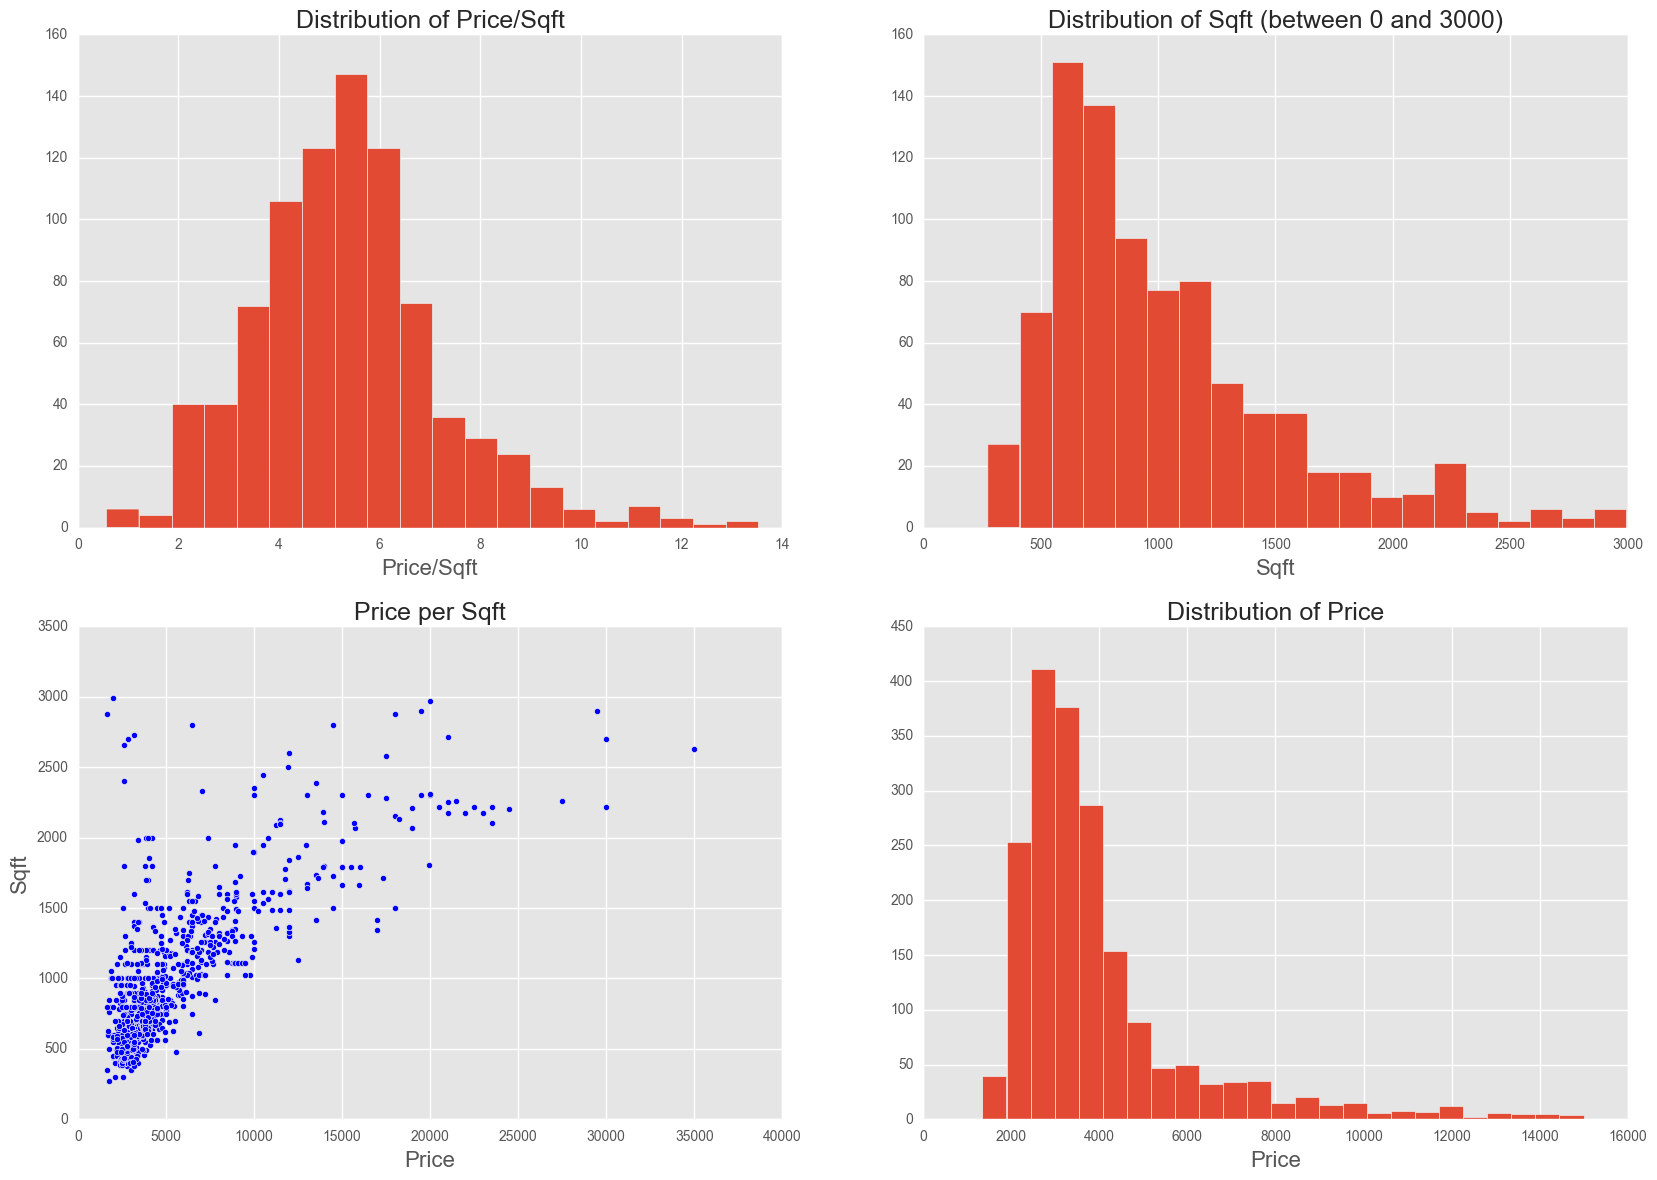

In [905]:
fig,axes = plt.subplots(2,2,figsize=(20,14))
axes[0][0].hist(x = zillow_home[zillow_home['price/sqft']>0]['price/sqft'],bins = 20) 
axes[0][0].set_title("Distribution of Price/Sqft",fontsize = 18)
axes[0][0].set_xlabel("Price/Sqft",fontsize = 16)

axes[0][1].hist(x=zillow_home[(zillow_home['sqft']>0) & (zillow_home['sqft']<3000)]['sqft'],bins=20)
axes[0][1].set_title('Distribution of Sqft (between 0 and 3000)',fontsize=18)
axes[0][1].set_xlabel('Sqft',fontsize=16)


axes[1][0].scatter(x=zillow_home[zillow_home['price/sqft']>0]['price'],y=zillow_home[zillow_home['price/sqft']>0]['sqft']);
axes[1][0].set_title('Price per Sqft',fontsize=18)
axes[1][0].set_xlabel('Price',fontsize=16)
axes[1][0].set_ylabel('Sqft',fontsize=16)
axes[1][0].set_xlim(0,40000)


axes[1][1].hist(x=zillow_home[zillow_home['price']<15000]['price'],bins=25)
axes[1][1].set_title('Distribution of Price',fontsize=18)
axes[1][1].set_xlabel('Price',fontsize=16);

Price and Sqft are highly skewed, anything beyond 6000 USD have less than count of 50 per price point. This would give a low number of samples for 4 bedrooms, given that this would be the range of the price point. Plotting Price vs Sqft show that it isn't quite linear; it is increasing at a decreasing rate, suggesting beyond a certain point (~ $5000 / 1000 sqft, that for each additional square foot, the price is less than one.

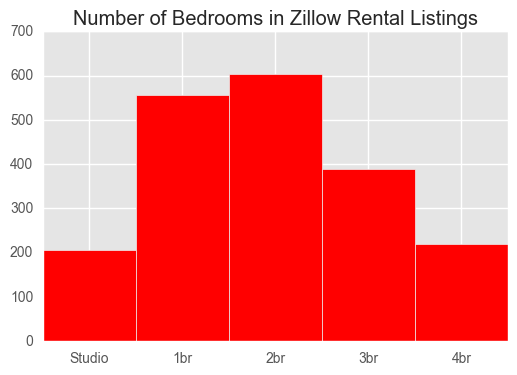

In [884]:
ind = np.arange(1,6)  # the x locations for the groups
width = 1       # the width of the bars

bed_count = zillow_home.groupby('beds')['beds'].count().to_frame('bed_count')
bed_count.reset_index(inplace = True)
bed_count['bed_count']
fig, ax = plt.subplots()
rects1 = ax.bar(ind, bed_count['bed_count'], width, color='r')
plt.xticks([x+.5 for x in ind],('Studio','1br','2br','3br','4br'));
plt.title("Number of Bedrooms in Zillow Rental Listings");

### Model - Predicting SQFT on missing values in the dataframe

After scraping zillow, there were missing values for square foot column. Since this is needed to calculate price per square foot, the values need to be imputed via regression

In [744]:
#From the histograms above, lets use a threshold of 2-9 $/sqft for the data
price_sqft_thresh = (zillow_home['price/sqft']>=2) & (zillow_home['price/sqft']<=9)
zillow_data = zillow_home[price_sqft_thresh].loc[:,['baths','beds','price','sqft','zipcode','neighborhood']]
zillow_data['neighborhood'] = le.fit_transform(zillow_data['neighborhood'])
zillow_data['zipcode'] = le.fit_transform(zillow_data['zipcode'])

zillow_test = zillow_home[zillow_home['sqft']==0]
zillow_df = zillow_data[zillow_home['sqft']>0]
y_z = zillow_df['sqft']
X_z = zillow_df.loc[:,['baths','beds','price','zipcode','neighborhood']]
print X_z.corr()
Xzpred = zillow_test[zillow_test['price']<14000].loc[:,['baths','beds','price','zipcode','neighborhood']]
Xzpred['neighborhood'] = le.fit_transform(Xzpred['neighborhood'])
Xzpred['zipcode'] = le.fit_transform(Xzpred['zipcode'])


Xz_train,Xz_test,yz_train,yz_test = train_test_split(X_z,y_z,test_size = 0.33,random_state = 25)

                 baths      beds     price   zipcode  neighborhood
baths         1.000000  0.595067  0.803253 -0.126581      0.169846
beds          0.595067  1.000000  0.425466  0.250311      0.133423
price         0.803253  0.425466  1.000000 -0.317995      0.185338
zipcode      -0.126581  0.250311 -0.317995  1.000000     -0.423350
neighborhood  0.169846  0.133423  0.185338 -0.423350      1.000000


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


#### Linear Regression

41809.8581519
0.787321039864


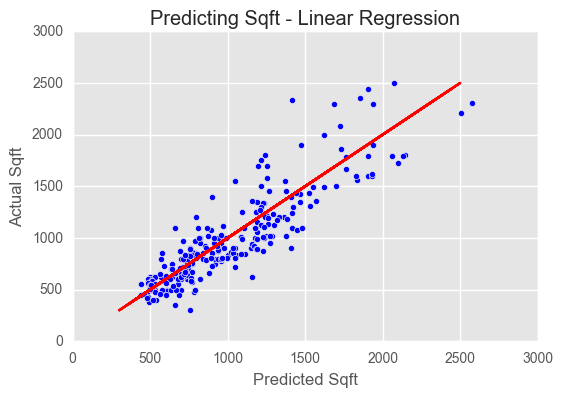

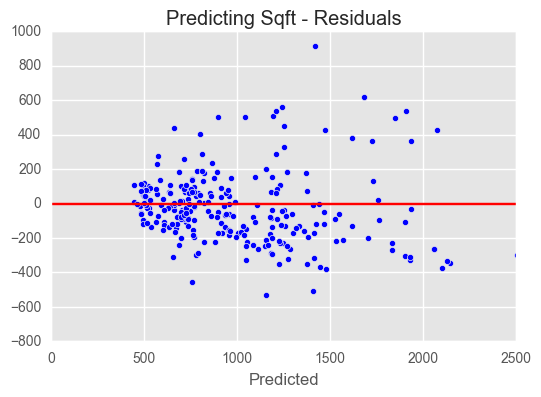

In [883]:
lrz = LinearRegression()
lrz = lrz.fit(Xz_train,yz_train)
lrz_pred = lrz.predict(Xz_test)
print mean_squared_error(yz_test,lrz_pred)
print r2_score(yz_test,lrz_pred)
plt.scatter(lrz_pred,yz_test)
plt.plot(yz_test,yz_test,color='red')
plt.title('Predicting Sqft - Linear Regression')
plt.xlabel('Predicted Sqft')
plt.ylabel('Actual Sqft')
plt.show()

plt.scatter(lrz_pred,yz_test - lrz_pred)
plt.title('Predicting Sqft - Residuals')
plt.xlabel('Predicted')
plt.hlines(0,0,2500,color='red')
plt.xlim(0,2500)
plt.show();

#### RidgeCV

41755.6006391
0.787597037725


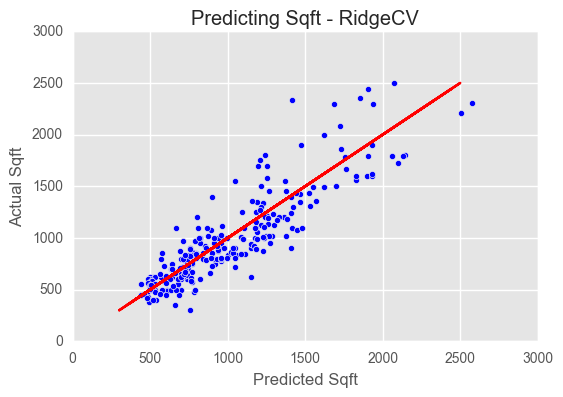

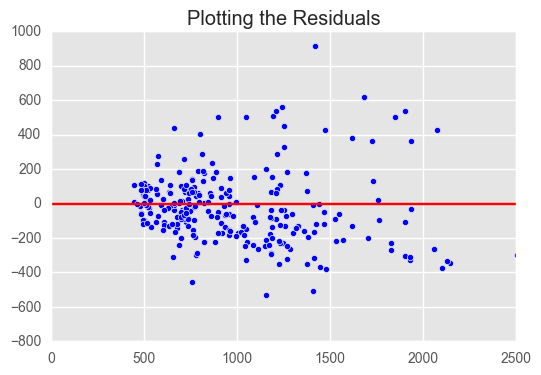

In [746]:
rcv = RidgeCV()
rcv = rcv.fit(Xz_train,yz_train)
rcv_pred = rcv.predict(Xz_test)
print mean_squared_error(yz_test,rcv_pred)
print r2_score(yz_test,rcv_pred)
plt.scatter(rcv_pred,yz_test)
plt.plot(yz_test,yz_test,color='red')
plt.title('Predicting Sqft - RidgeCV')
plt.xlabel('Predicted Sqft')
plt.ylabel('Actual Sqft')
plt.show()

plt.scatter(rcv_pred,yz_test - lrz_pred)
plt.hlines(0,0,2500,color='red')
plt.title('Plotting the Residuals')

plt.xlim(0,2500)
plt.show();

#### Extra Trees

42579.1535348
0.783407777554


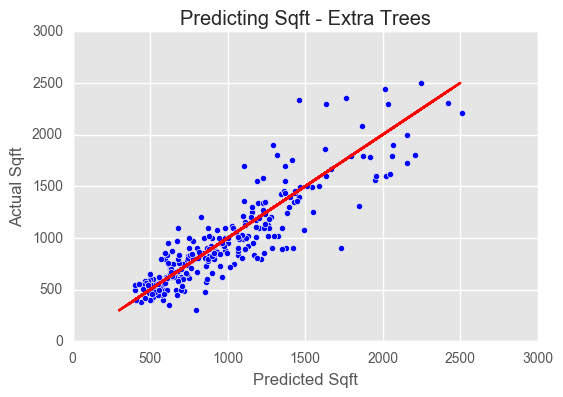

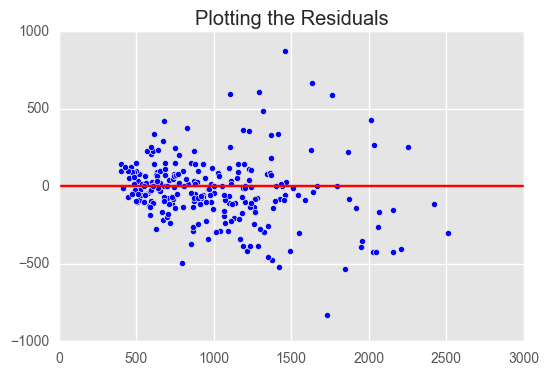

In [747]:
etz = ExtraTreesRegressor(n_estimators = 1000,n_jobs=-1)
etz = etz.fit(Xz_train,yz_train)
etz_pred = etz.predict(Xz_test)
print mean_squared_error(yz_test,etz_pred)
print r2_score(yz_test,etz_pred)
plt.scatter(etz_pred,yz_test)
plt.plot(yz_test,yz_test,color='red')
plt.title('Predicting Sqft - Extra Trees')
plt.xlabel('Predicted Sqft')
plt.ylabel('Actual Sqft')
plt.show()

plt.scatter(etz_pred,yz_test - etz_pred)
plt.title('Plotting the Residuals')

plt.hlines(0,0,3000,color='red')
plt.xlim(0,3000)
plt.show();

In [756]:
feat_importance = pd.concat([pd.Series(X_z.columns,name = 'Feature'),pd.Series(etz.feature_importances_,name='Feature Importance')],axis=1)
feat_importance.sort_values('Feature Importance',ascending=False)

,Feature,Feature Importance
0,baths,0.464420
2,price,0.297152
1,beds,0.151778
3,zipcode,0.044563
4,neighborhood,0.042086


In [751]:
#using the zillow listings with sqft missing, predict using extra trees regression
etztest_pred = etz.predict(Xzpred)
#shape matches up with the number of missing sqft entries
print pd.Series(etztest_pred).shape
#lets add it back to the dataframe
zillow_nosqft = zillow_home[(zillow_home['sqft']==0) & (zillow_home['price']<14000) ].copy()
zillow_nosqft['pred_sqft']= etztest_pred
zillow_nosqft['sqft'] = zillow_nosqft['pred_sqft']
del zillow_nosqft['pred_sqft']
#rounding and converting to integer
zillow_nosqft['sqft'] = zillow_nosqft['sqft'].round(0).astype(int)
#isolating the listings with sqft entries
zillow_sqft = zillow_home[zillow_home['sqft']>0].copy()
#appending the predicted to the ones with sqft entries
zillowdf = zillow_sqft.append(zillow_nosqft)
zillowdf.reset_index(inplace = True,drop=True)
zillowdf['price/sqft'] = (zillowdf['price']/zillowdf['sqft']).round(2)
#newly constructed dataframe
zillowdf.head()
zillowdf.rename(columns = {'beds':'bedrooms'},inplace = True)
zillowdf.to_csv('zillow_files/zillow_df_'+date+'.csv')

(1111,)


## AirBnB

AirBnB data was scraped by contributors at http://insideairbnb.com/get-the-data.html. The calendar data and listing data for 2015 and 2016 are used. Considering 2016 isnt completed yet, there will not be accurate information for November and December. Also, September 2016 was not scraped, and thus, shows low occupancy, which is incorrect because September is a peak month given New York Fashion week happens in mid-September.

### Risks

1) No Scraping calendar for September 2016, will show lower numbers, as indicated in the graphs below

2) No attribute for listing or photo quality, thus will be underfitting as they are two important qualities when people decide on listings.

3) Pricing errors when calculating average prices for month. Such as NYE prices being applied to January (causing Jan prices to be inflated).

### Assumptions

1) The listed price in the calendar scrape when the listing was available is the posted price for that day.

2) Low Occupancy and High Occupancy (monthly) are listings that are generally inactive.

    A) Low Occupancy: indicates a very high price,if anyone was willing to pay that, the host would accept.
    B) High Occupancy: indicates that the calendar was blocked off and not rented out to users. 
    C) Occupancies should generally range in 60-75% per year.
    
3) If a median price was found in the calendar scrapes, then it would be the price for that month. If one could not be found, sorrunding months or yearly median price would be used. 

Thus, limits will be put on the data in the form of a min,max occupancy % as well as a min, max price limit.

### Exploratory Data Analysis

The data munging for calendars is located in the .py files, and the rest take use of the functions below. The variables used in this analysis are bedrooms, room_type, neighborhood, price (adr), number of reviews, and the rating.
#### Creating Functions

In [117]:
def listing_cleanup(path):
    """
    This function takes an airbnb listing and returns the columns that will be needed for merging later
    """
    listings = pd.read_csv(path)
    listings.rename(columns = {'neighbourhood_group_cleansed':'area'},inplace = True)
    
    cols_to_use = []
    for x in pd.read_json('/Users/amishdalal/DSI-NYC-2/projects/projects-capstone/AirBnB/abnb_cols_to_use.json')[0]:
        cols_to_use.append(x)
    cols_to_use.append('neighbourhood_cleansed')
    listings = listings.loc[:,cols_to_use]
    
    listings.rename(columns = {'neighbourhood':'neighborhood'},inplace = True)
    if listings['price'].dtype != 'int64':
        #converting price to int
        listings['price'] = listings['price'].apply(lambda x: x.replace('$','').replace(',','').replace('.00','')).astype(int)
    else:
        pass
    #only selecting non null bedrooms
    listings = listings[listings['bedrooms'].notnull()]
    #converting bedrooms to int
    listings['bedrooms'] = listings['bedrooms'].astype(int)
    #only selecting real beds
    listings = listings[listings['bed_type']=='Real Bed']
    
    #creating a groupby to get each listings avg price
    listings = listings.groupby(['id','neighborhood','zipcode','bedrooms','bathrooms','room_type',\
                          'number_of_reviews','review_scores_rating'])['price'].mean().to_frame()
    listings.reset_index(inplace = True)
    #ensuring that all neighborhoods are 
    nhood_area = pd.read_csv('/Users/amishdalal/DSI-NYC-2/projects/projects-capstone/AirBnB/neighbourhoods.csv')
    
    listings = pd.merge(listings,nhood_area,on=['neighborhood'])
    listings.rename(columns = {'id':'listing_id'},inplace = True)
    
    return listings


def calendars(path,listings_df,occ_lower,occ_upper,review_limit):
    """
    This function takes the calendars that were aggregated from each csv file and merges with listings dataframe.
    Also filters out low/high occupancies, takes a minimum review number, filters out 5 or more bedrooms and shared rooms
    """
    cal_df = pd.read_csv(path,index_col=0)
    cal_df.rename(columns = {'neighbourhood':'neighborhood'},inplace = True)
    
    #merging with listings df
    cal_df = pd.merge(cal_df,listings_df)

    print 'Original DataFrame shape is:',cal_df.shape
    #dropping duplicates
    cal_df.drop_duplicates(inplace = True)
    print 'DataFrame after dropping duplicates is:',cal_df.shape
    
    #dropping any room types that are null, shared room or any bedrooms greater than 5 (only using 4 or less)
    
    cal_df1 = cal_df[(cal_df['room_type'].notnull()) & (cal_df['room_type']!='Shared room') & cal_df['bedrooms'] < 5]
    
    #because there are some that are inactive listings, that could be whole calendar is blocked (high yearly occupancy)
    #or low occupancy (very high price)
    
    #setting occupancy limits
    cal_df1 = cal_df[(cal_df['occ_yr%']<=occ_upper) & (cal_df['occ_yr%']>=occ_lower)]
    
    #setting min number of reviews to indicate activity
    print 'Min number of reviews in this dataframe is:',cal_df1['number_of_reviews'].min()
    cal_df2 = cal_df1[cal_df1['number_of_reviews']>=review_limit]
    
    return cal_df2
    

    
def one_br_split(df):
    """
    This function takes the calendar dataframe that is cleaned and returns only one bedroom listings
    """
    df = df[(df['bedrooms']==1)].copy()
    df['revpar'] = (df['avg_price'] * df['occ%']/100)
    
    return df

def entire_unit_split(df):
    '''Splitting the dataset into listings that are only entire homes'''
    occ_entire = df[(df['room_type']!='Private room')].copy()
    occ_entire['bedrooms'].value_counts()
    
    competitors = occ_entire.groupby(['zipcode','neighborhood','bedrooms'])['listing_id'].count().to_frame('num_comp')
    competitors.reset_index(inplace = True)

    occ_entire = pd.merge(occ_entire,competitors,on=['zipcode','neighborhood','bedrooms'])
    occ_entire = occ_entire[occ_entire['avg_price']!=0]  
    
    return occ_entire

def histogram_1br(df1,df2,yr1,yr2,color=None):
    '''Creates a histogram subplot of private and entire 1br'''
    yr1 = str(yr1)
    yr2 = str(yr2)
    fig,axes = plt.subplots(2,2,figsize=(20,14))
    axes[0][0].hist(x = df1[(df1['room_type']=='Private room')]['avg_price'],bins=20,color=color)
    axes[0][0].set_title("Distribution of Price for Private Room for "+yr1,fontsize = 18)
    axes[0][0].set_xlabel("Price",fontsize = 16)

    axes[0][1].hist(x=df1[(df1['room_type']!='Private room')]['avg_price'],bins=20,color=color)
    axes[0][1].set_title('Distribution of Price for Entire 1BR for '+yr1,fontsize=18)
    axes[0][1].set_xlabel('Price',fontsize=16)

    axes[1][0].hist(x=df2[(df2['room_type']=='Private room')]['avg_price'],color=color)
    axes[1][0].set_title('Distribution of Price for Private Room for '+yr2,fontsize=18)
    axes[1][0].set_xlabel('Price',fontsize=16)

    axes[1][1].hist(x=df2[(df2['room_type']!='Private room')]['avg_price'],color=color)
    axes[1][1].set_title('Distribution of Price for Entire 1BR  for '+yr2,fontsize=18)
    axes[1][1].set_xlabel('Price',fontsize=16)
    plt.show();
    
    return

def histograms(df,yr,color=None):
    '''creates a histogram subplot of distribution of prices for studio/1br, 2br, 3br and 4br listings'''    
    yr = str(yr)
    fig,axes = plt.subplots(2,2,figsize=(20,14))
    axes[0][0].hist(x = df[(df['bedrooms']==1) | (df['bedrooms']==0) ]['avg_price'],bins=20,color=color)
    axes[0][0].set_title("Distribution of Price for Studio/1BR for "+yr,fontsize = 18)
    axes[0][0].set_xlabel("Price",fontsize = 16)

    axes[0][1].hist(x=df[(df['bedrooms']==2)]['avg_price'],bins=20,color=color)
    axes[0][1].set_title('Distribution of Price for 2BR for '+yr,fontsize=18)
    axes[0][1].set_xlabel('Price',fontsize=16)

    axes[1][0].hist(x=df[(df['bedrooms']==3)]['avg_price'],color=color)
    axes[1][0].set_title('Distribution of Price for 3BR for '+yr,fontsize=18)
    axes[1][0].set_xlabel('Price',fontsize=16)

    axes[1][1].hist(x=df[(df['bedrooms']==4)]['avg_price'],color=color)
    axes[1][1].set_title('Distribution of Price for 4BR for '+yr,fontsize=18)
    axes[1][1].set_xlabel('Price',fontsize=16)
    plt.show();
    return

def price_thresholds_1br(df,priv_lower,priv_upper,entire_lower,entire_upper):
    '''Setting price tresholds to remove outliers'''
    df_priv = df[(df['room_type']=='Private room')&(df['avg_price']>priv_lower) & (df['avg_price']<priv_upper)]
    df_entire = df[(df['room_type']!='Private room')&(df['avg_price']>entire_lower) & (df['avg_price']<entire_upper)]
    df_total = df_priv.append(df_entire)
    df_total.reset_index(inplace = True,drop=True)
    df_total['revpar'] = (df_total['avg_price'] * df_total['occ%']/100).round(2)
    print 'Removing outliers, the dataframe shape is:',df_total.shape
    
    return df_total

    
def price_thresholds(df,onebr_lower,onebr_upper,twobr_lower,twobr_upper,threebr_lower,threebr_upper,fourbr_lower,fourbr_upper):
    '''Setting price tresholds to remove outliers'''
    df_studio = df[(df['bedrooms']==0) & (df['avg_price']>onebr_lower) & (df['avg_price']<onebr_upper) ]
    df_1br = df[(df['bedrooms']==1) & (df['avg_price']>onebr_lower) & (df['avg_price']<onebr_upper) ] 
    df_2br = df[(df['bedrooms']==2) & (df['avg_price']>twobr_lower) & (df['avg_price']<twobr_upper) ]
    df_3br = df[(df['bedrooms']==3) & (df['avg_price']>threebr_lower) & (df['avg_price']<threebr_upper) ]
    df_4br = df[(df['bedrooms']==4) & (df['avg_price']>fourbr_lower) & (df['avg_price']<fourbr_upper) ] 
    
    #appending all individual dataframes together
    df_1br = df_1br.append(df_studio)
    df_1br_2br = df_1br.append(df_2br)
    df_3br_4br = df_3br.append(df_4br)
    data = df_1br_2br.append(df_3br_4br)
    data.reset_index(inplace = True,drop=True)
    #calculating revpar
    data['revpar'] = (data['avg_price'] * data['occ%']/100).round(2)
    print 'Removing outliers, the dataframe shape is:',data.shape
    return data


def trend_graphs(df,yr):
    '''Creating groupby on neighborhood and finding average occupancy and price'''
    yr = str(yr)
    occ_by_nhood = df.groupby(['neighborhood','area','bedrooms','month'])['days_per_month','occupied','listing_id'].\
                            agg({'listing_id':len,'days_per_month':sum,'occupied':sum})
    occ_by_nhood.reset_index(inplace= True)
    occ_by_nhood['occ%'] = (100*(occ_by_nhood['occupied'] / occ_by_nhood['days_per_month'])).round(2)
    occ_by_nhood_price = data_2015.groupby(['neighborhood','area','bedrooms','month'])['avg_price'].\
            agg({'avg_price_mean':np.mean,'avg_price_median':np.median})
    occ_by_nhood_price.reset_index(inplace = True)
    #merging the occupancy by neighborhood and price
    nhood_metrics = pd.merge(occ_by_nhood,occ_by_nhood_price)
    nhood_metrics['avg_price_mean'] = nhood_metrics['avg_price_mean'].astype(int)
    nhood_metrics['avg_price_median'] = nhood_metrics['avg_price_median'].astype(int)
    nhood_metrics['revpar'] = (nhood_metrics['avg_price_median'] * nhood_metrics['occ%']/100).round(2)
    
    #plotting occupancy by month by bedroom
    plt.subplots(figsize=(15,7))
    sns.distplot(nhood_metrics[nhood_metrics['bedrooms']==4]['occ%'])
    sns.pointplot(data=nhood_metrics,x='month',y='occ%',hue='bedrooms')
    plt.title('Occupancy per Month by Bedroom for '+yr,fontsize=18)
    plt.ylabel('Occupancy',fontsize=14)
    plt.xlabel('Month',fontsize = 14)
    plt.ylim(0,100)
    plt.show();
    
    #plotting price by month by bedroom
    plt.subplots(figsize=(15,7))
    sns.pointplot(data=nhood_metrics,x='month',y='avg_price_mean',hue='bedrooms')
    plt.title('Median Price per Month by Bedroom for '+yr,fontsize=18)
    plt.ylabel('Median Price',fontsize=14)
    plt.xlabel('Month',fontsize = 14)
    plt.show();
    
    #plotting RevPAR (occupancy * ADR) by month by bedroom
    plt.subplots(figsize=(15,7))
    sns.pointplot(data=nhood_metrics,x='month',y='revpar',hue='bedrooms',estimator=np.mean)
    plt.title('Median RevPAR per Month by Bedroom for '+yr,fontsize=18)
    plt.ylabel('Median RevPAR',fontsize=14)
    plt.xlabel('Month',fontsize = 14)
    plt.ylim(0,600)
    plt.show;
    return nhood_metrics

#### 2015 Listings

In [20]:
listings_15df = listing_cleanup('airbnb_files/listings_122015.csv')
listings_15df.head()

,listing_id,neighborhood,zipcode,bedrooms,bathrooms,room_type,number_of_reviews,review_scores_rating,price,area,sub_area
0,105,Hell's Kitchen,10036,1,1.0,Private room,39,96.0,149,Manhattan,Midtown
1,4989,Hell's Kitchen,10036,1,1.0,Entire home/apt,13,85.0,200,Manhattan,Midtown
2,5178,Hell's Kitchen,10019,1,1.0,Private room,207,87.0,73,Manhattan,Midtown
3,5818,Hell's Kitchen,10019,1,1.0,Private room,43,94.0,195,Manhattan,Midtown
4,5862,Hell's Kitchen,10019,2,2.0,Entire home/apt,30,93.0,475,Manhattan,Midtown


#### 2016 Listings

In [21]:
listings_16df = listing_cleanup('airbnb_files/listings_102016.csv')
listings_16df.head()

,listing_id,neighborhood,zipcode,bedrooms,bathrooms,room_type,number_of_reviews,review_scores_rating,price,area,sub_area
0,2515,Harlem,10026,1,1.0,Private room,143,92.0,59,Manhattan,Upper Manhattan
1,8225,Harlem,10026,1,1.0,Private room,105,90.0,49,Manhattan,Upper Manhattan
2,9704,Harlem,10027,1,1.5,Private room,37,98.0,55,Manhattan,Upper Manhattan
3,15345,Harlem,10026,1,1.0,Private room,98,93.0,85,Manhattan,Upper Manhattan
4,23481,Harlem,10027,1,1.0,Entire home/apt,69,90.0,140,Manhattan,Upper Manhattan


#### 2015 Calendar

In [153]:
path15 = 'airbnb_files/calendar_2015_agg_df_120616.csv'
occ15 = calendars(path15,listings_15df,25,80,5)

#Finding number of competitors for each neighborhood, bedroom type
num_comp15 = occ15.groupby(['neighborhood','bedrooms','room_type','listing_id'])['year'].count().to_frame('count')
num_comp15.reset_index(inplace=True)
num_comp15 = num_comp15.groupby(['neighborhood','bedrooms','room_type'])['listing_id'].count().to_frame('num_comps')
num_comp15.reset_index(inplace=True)
print occ15.shape
occ15 = pd.merge(occ15,num_comp15,on=['neighborhood','bedrooms','room_type'])
print occ15.shape
occ15.head()

#creating dataframes for 1br (private and entire) and all entire homes
occ15_1br_all = one_br_split(occ15)  
occ15_entire = entire_unit_split(occ15)


Original DataFrame shape is: (156636, 20)
DataFrame after dropping duplicates is: (156636, 20)
Min number of reviews in this dataframe is: 1
(55296, 20)
(55296, 21)


In [61]:
print 'Dataframe for calendar for all listings',occ15.shape
print 'Dataframe for 1BR units:',occ15_1br_all.shape
print 'Dataframe for Entire home/apt units:',occ15_entire.shape
occ15.head()

Dataframe for calendar for all listings (55296, 20)
Dataframe for 1BR units: (40380, 21)
Dataframe for Entire home/apt units: (34364, 21)


,listing_id,year,month,days_per_month,available,occupied,occ_yr,occ%,occ_yr%,avg_price,neighborhood,zipcode,bedrooms,bathrooms,room_type,number_of_reviews,review_scores_rating,price,area,sub_area
0,2515,2015,1,31,5,26,254,83.87,69.59,99.0,Harlem,10026,1,2.0,Private room,106,94.0,59,Manhattan,Upper Manhattan
1,2515,2015,2,28,19,9,254,32.14,69.59,79.0,Harlem,10026,1,2.0,Private room,106,94.0,59,Manhattan,Upper Manhattan
2,2515,2015,3,31,12,19,254,61.29,69.59,99.0,Harlem,10026,1,2.0,Private room,106,94.0,59,Manhattan,Upper Manhattan
3,2515,2015,4,30,14,16,254,53.33,69.59,99.0,Harlem,10026,1,2.0,Private room,106,94.0,59,Manhattan,Upper Manhattan
4,2515,2015,5,31,7,24,254,77.42,69.59,99.0,Harlem,10026,1,2.0,Private room,106,94.0,59,Manhattan,Upper Manhattan


#### 2016 Calendar

In [154]:
path16 = 'airbnb_files/calendar_2016_agg_df_120716.csv'
occ16 = calendars(path16,listings_16df,25,80,5)

#Finding number of competitors for each neighborhood, bedroom type
num_comp16 = occ16.groupby(['neighborhood','bedrooms','room_type','listing_id'])['year'].count().to_frame('count')
num_comp16.reset_index(inplace=True)
num_comp16 = num_comp16.groupby(['neighborhood','bedrooms','room_type'])['listing_id'].count().to_frame('num_comps')
num_comp16.reset_index(inplace=True)
print occ16.shape
occ16 = pd.merge(occ16,num_comp16,on=['neighborhood','bedrooms','room_type'])
print occ16.shape
#creating dataframes for 1br (private and entire) and all entire homes

occ16_1br_all = one_br_split(occ16)  
occ16_entire = entire_unit_split(occ16)

Original DataFrame shape is: (154380, 20)
DataFrame after dropping duplicates is: (154380, 20)
Min number of reviews in this dataframe is: 1
(65952, 20)
(65952, 21)


In [155]:
print 'Dataframe for calendar for all listings',occ16.shape
print 'Dataframe for 1BR units:',occ16_1br_all.shape
print 'Dataframe for Entire home/apt units:',occ16_entire.shape
occ16.head()

Dataframe for calendar for all listings (65952, 21)
Dataframe for 1BR units: (46848, 22)
Dataframe for Entire home/apt units: (37587, 22)


,listing_id,year,month,days_per_month,available,occupied,occ_yr,occ%,occ_yr%,avg_price,...,zipcode,bedrooms,bathrooms,room_type,number_of_reviews,review_scores_rating,price,area,sub_area,num_comps
0,2515,2016,1,31,8,23,203,74.19,55.62,99,...,10026,1,1.0,Private room,143,92.0,59,Manhattan,Upper Manhattan,137
1,2515,2016,2,29,27,2,203,6.90,55.62,59,...,10026,1,1.0,Private room,143,92.0,59,Manhattan,Upper Manhattan,137
2,2515,2016,3,31,10,21,203,67.74,55.62,99,...,10026,1,1.0,Private room,143,92.0,59,Manhattan,Upper Manhattan,137
3,2515,2016,4,30,6,24,203,80.00,55.62,99,...,10026,1,1.0,Private room,143,92.0,59,Manhattan,Upper Manhattan,137
4,2515,2016,5,31,6,25,203,80.65,55.62,99,...,10026,1,1.0,Private room,143,92.0,59,Manhattan,Upper Manhattan,137


### Visualizations

Histograms before and after implementing price thresholds for Private Rooms and Entire 1 bedrooms

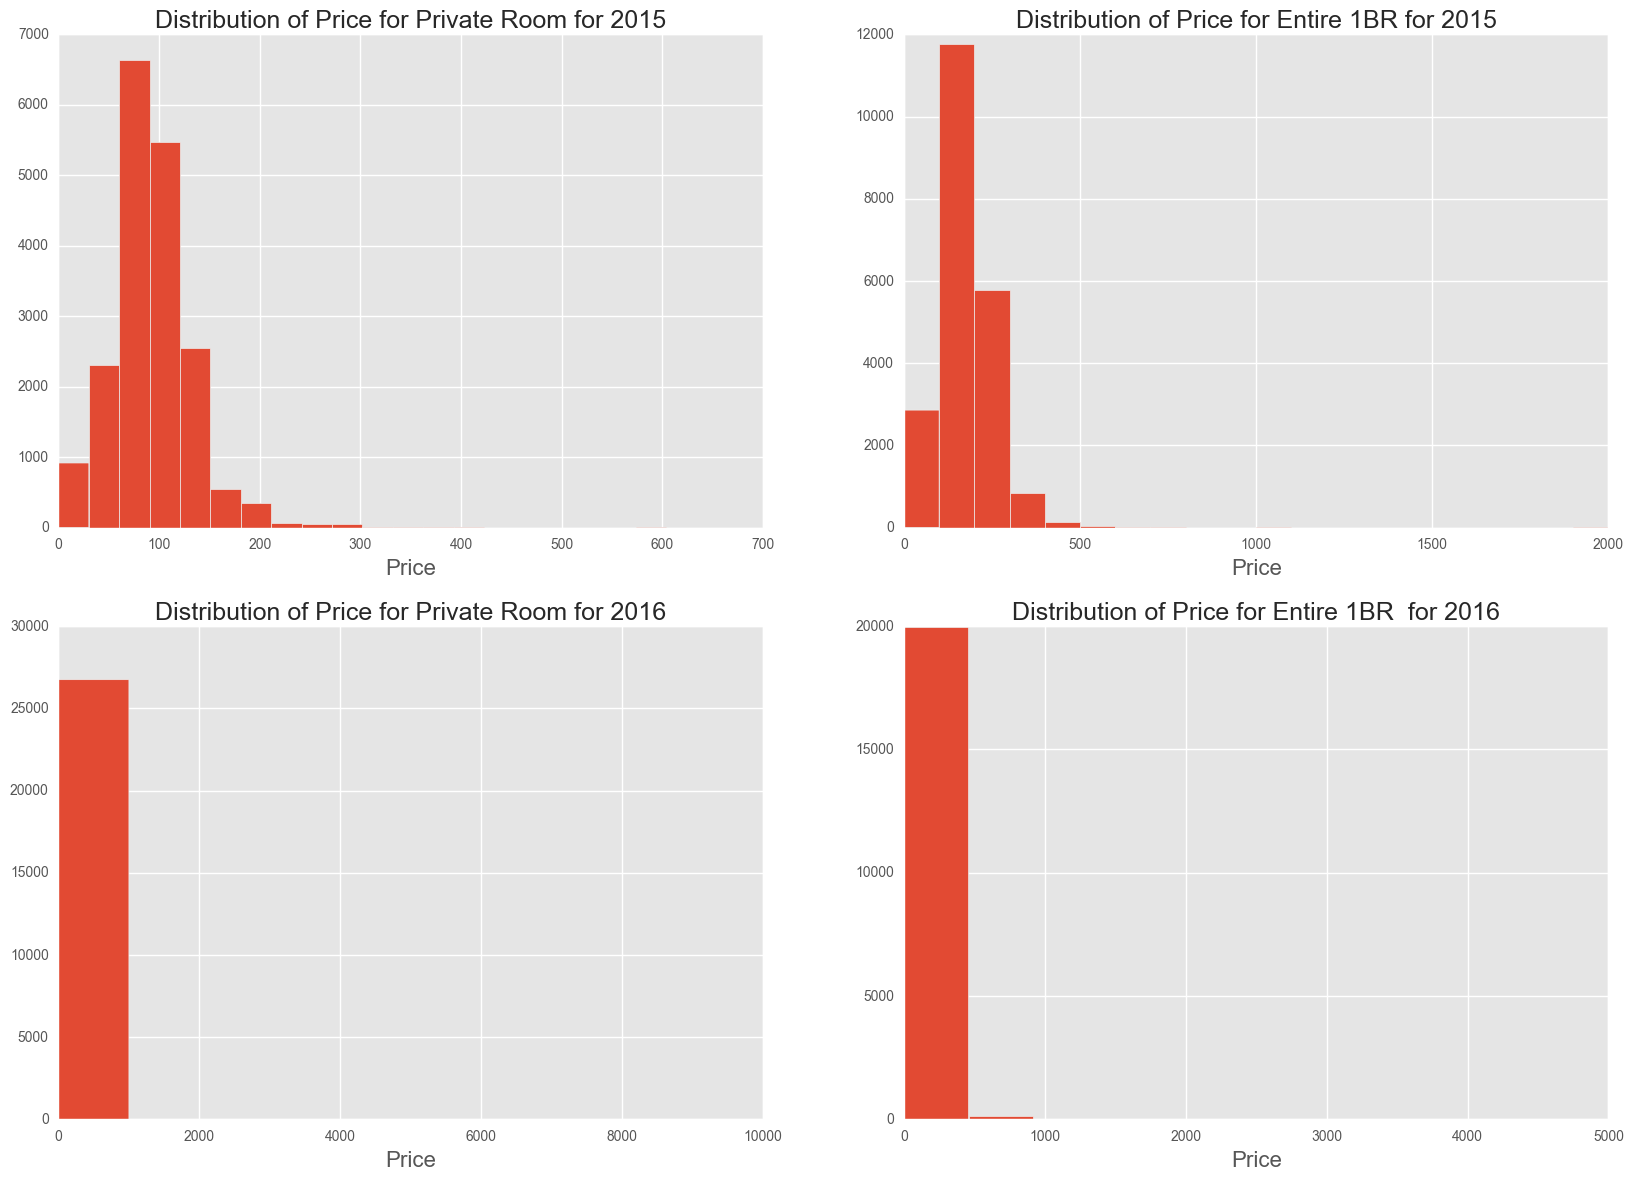

In [156]:
histogram_1br(occ15_1br_all,occ16_1br_all,2015,2016)

Histograms show highly skewed distributions, thus the need to restrict pricing to a certain threshold

In [223]:
data_1br15 = price_thresholds_1br(occ15_1br_all,40,150,50,350)
data_1br16 = price_thresholds_1br(occ16_1br_all,40,150,50,350)

Removing outliers, the dataframe shape is: (35940, 22)
Removing outliers, the dataframe shape is: (40710, 22)


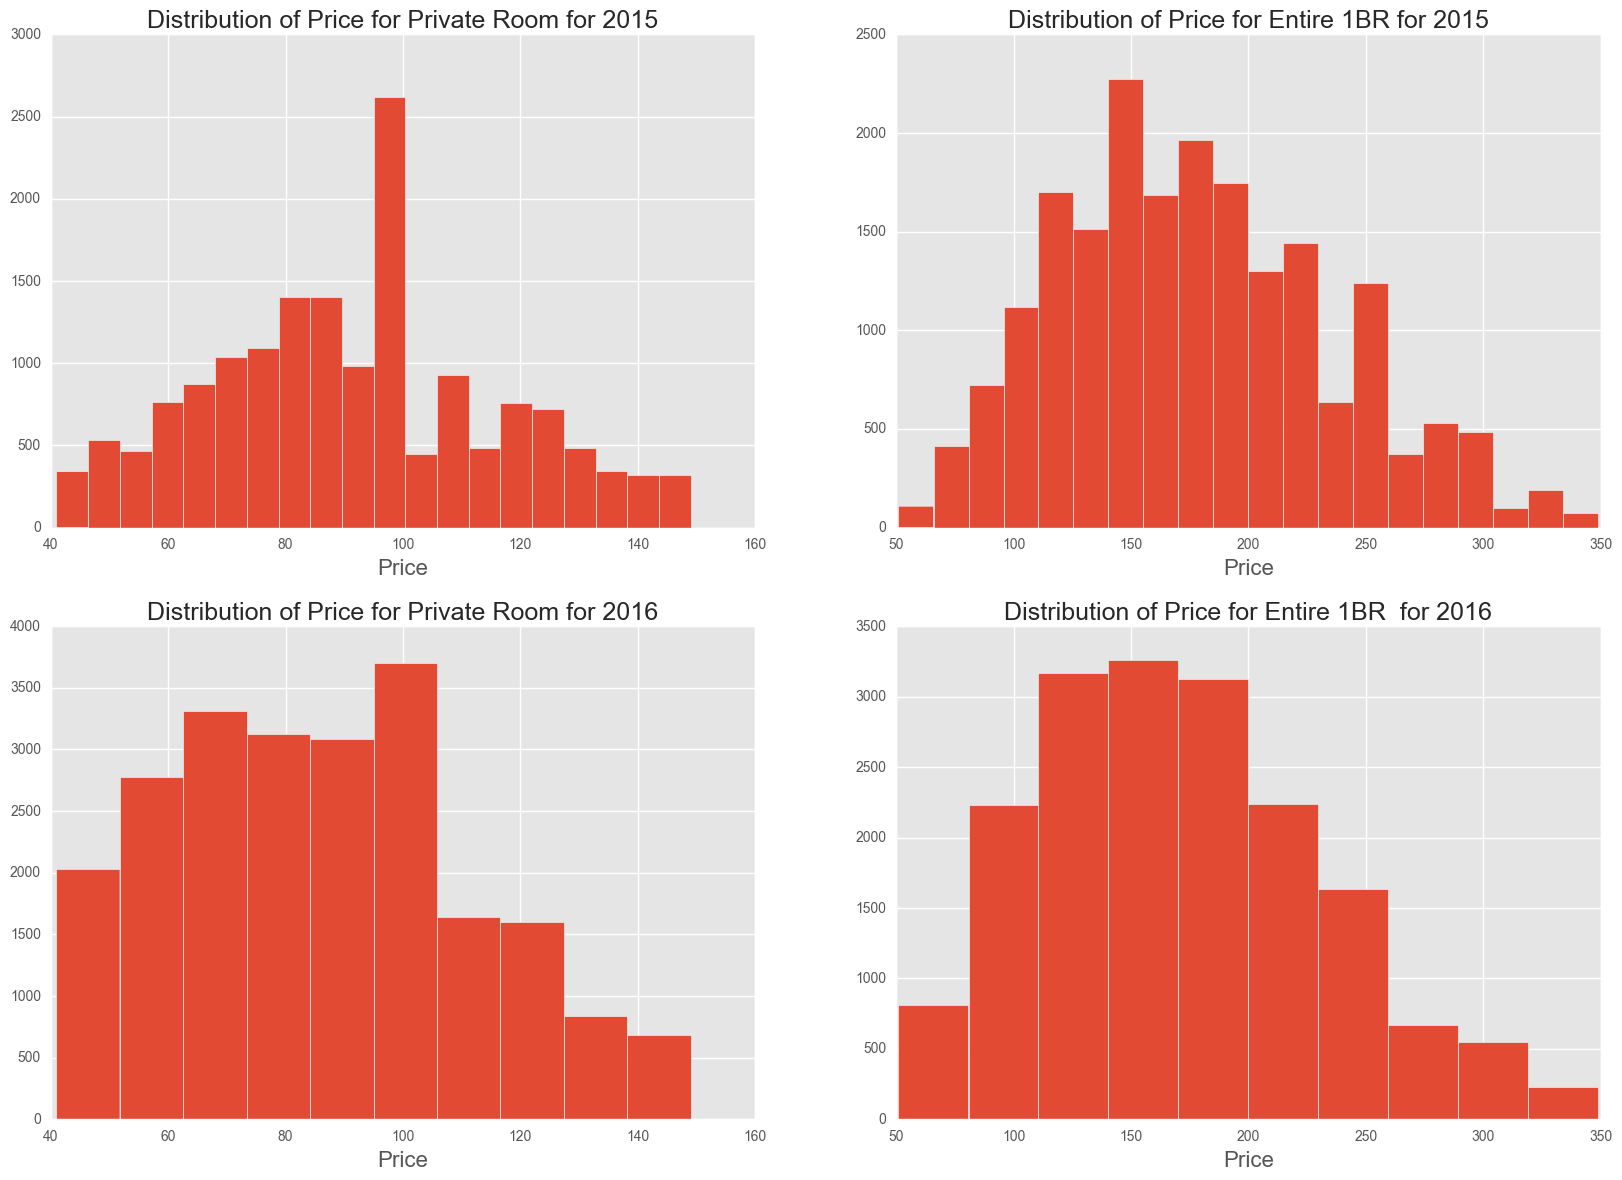

In [230]:
histogram_1br(data_1br15,data_1br16,2015,2016)

#### Visualizations for Entire unit Listings (studio, 1br, 2br, 3br, and 4br)

Before setting price thresholds

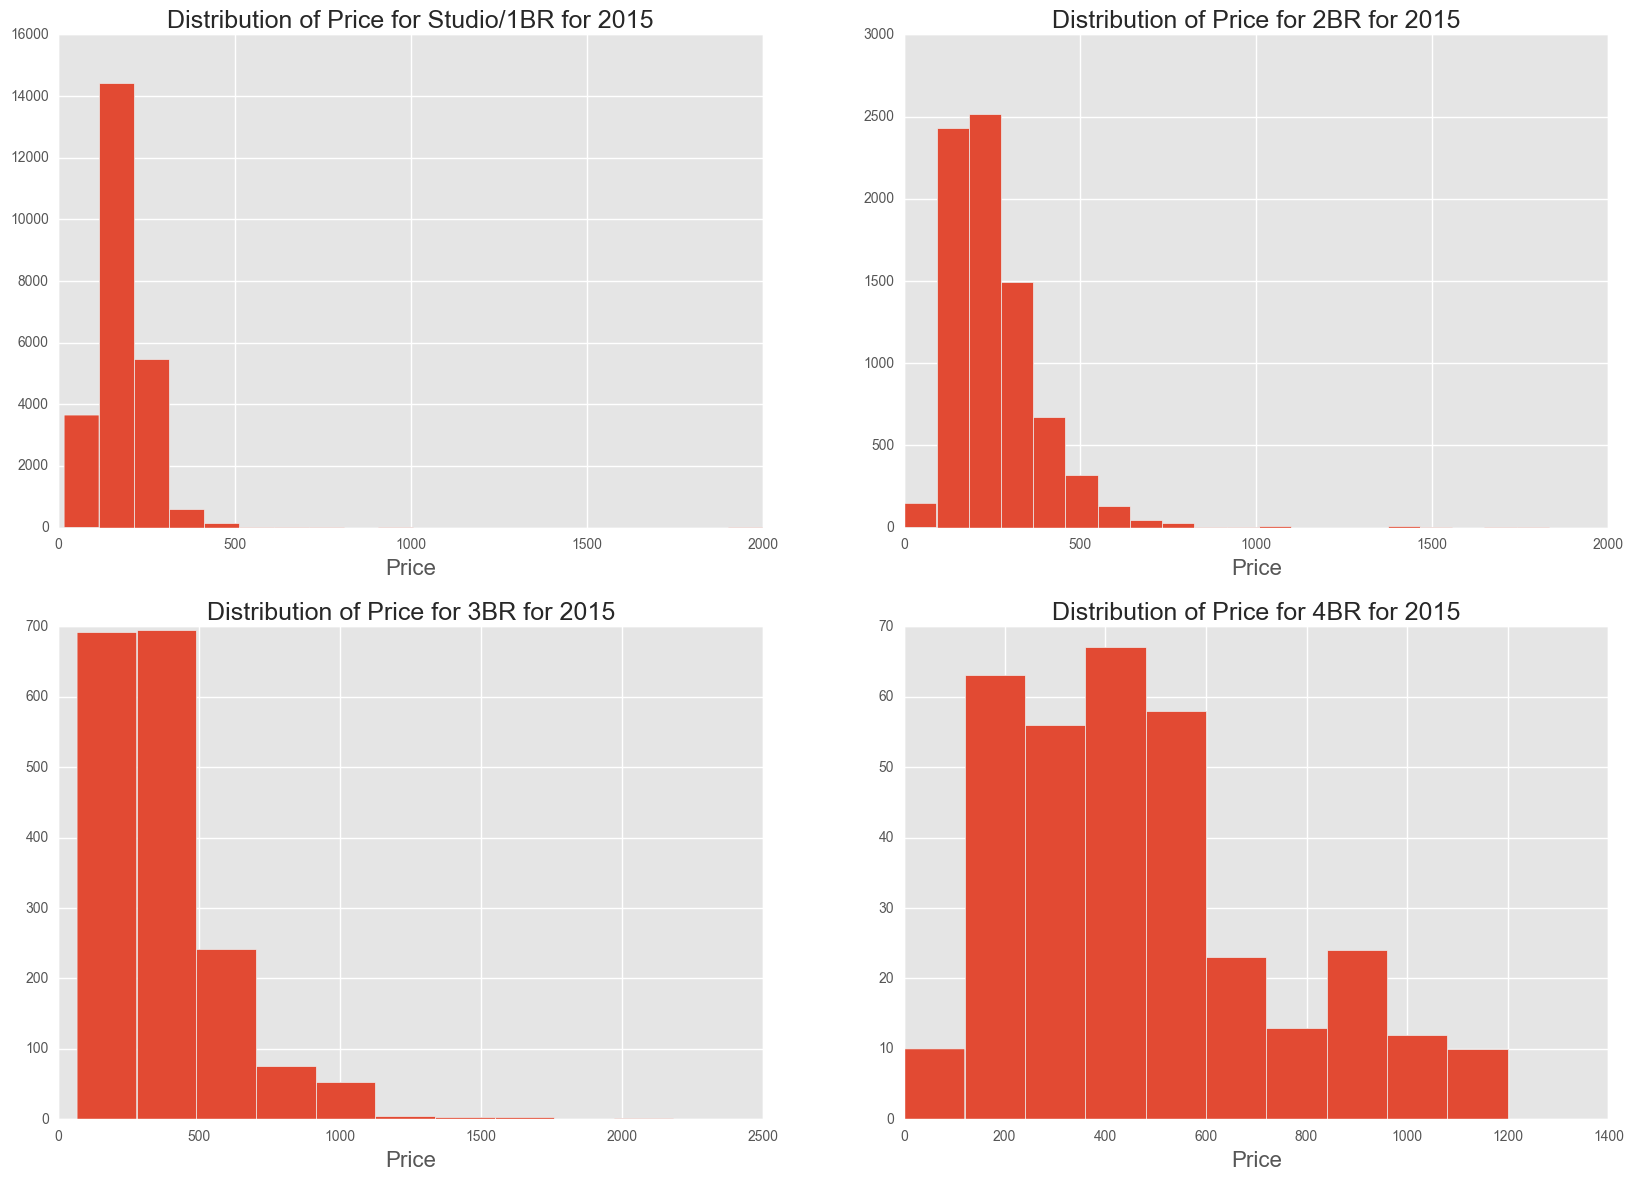

In [159]:
histograms(occ15_entire,2015)

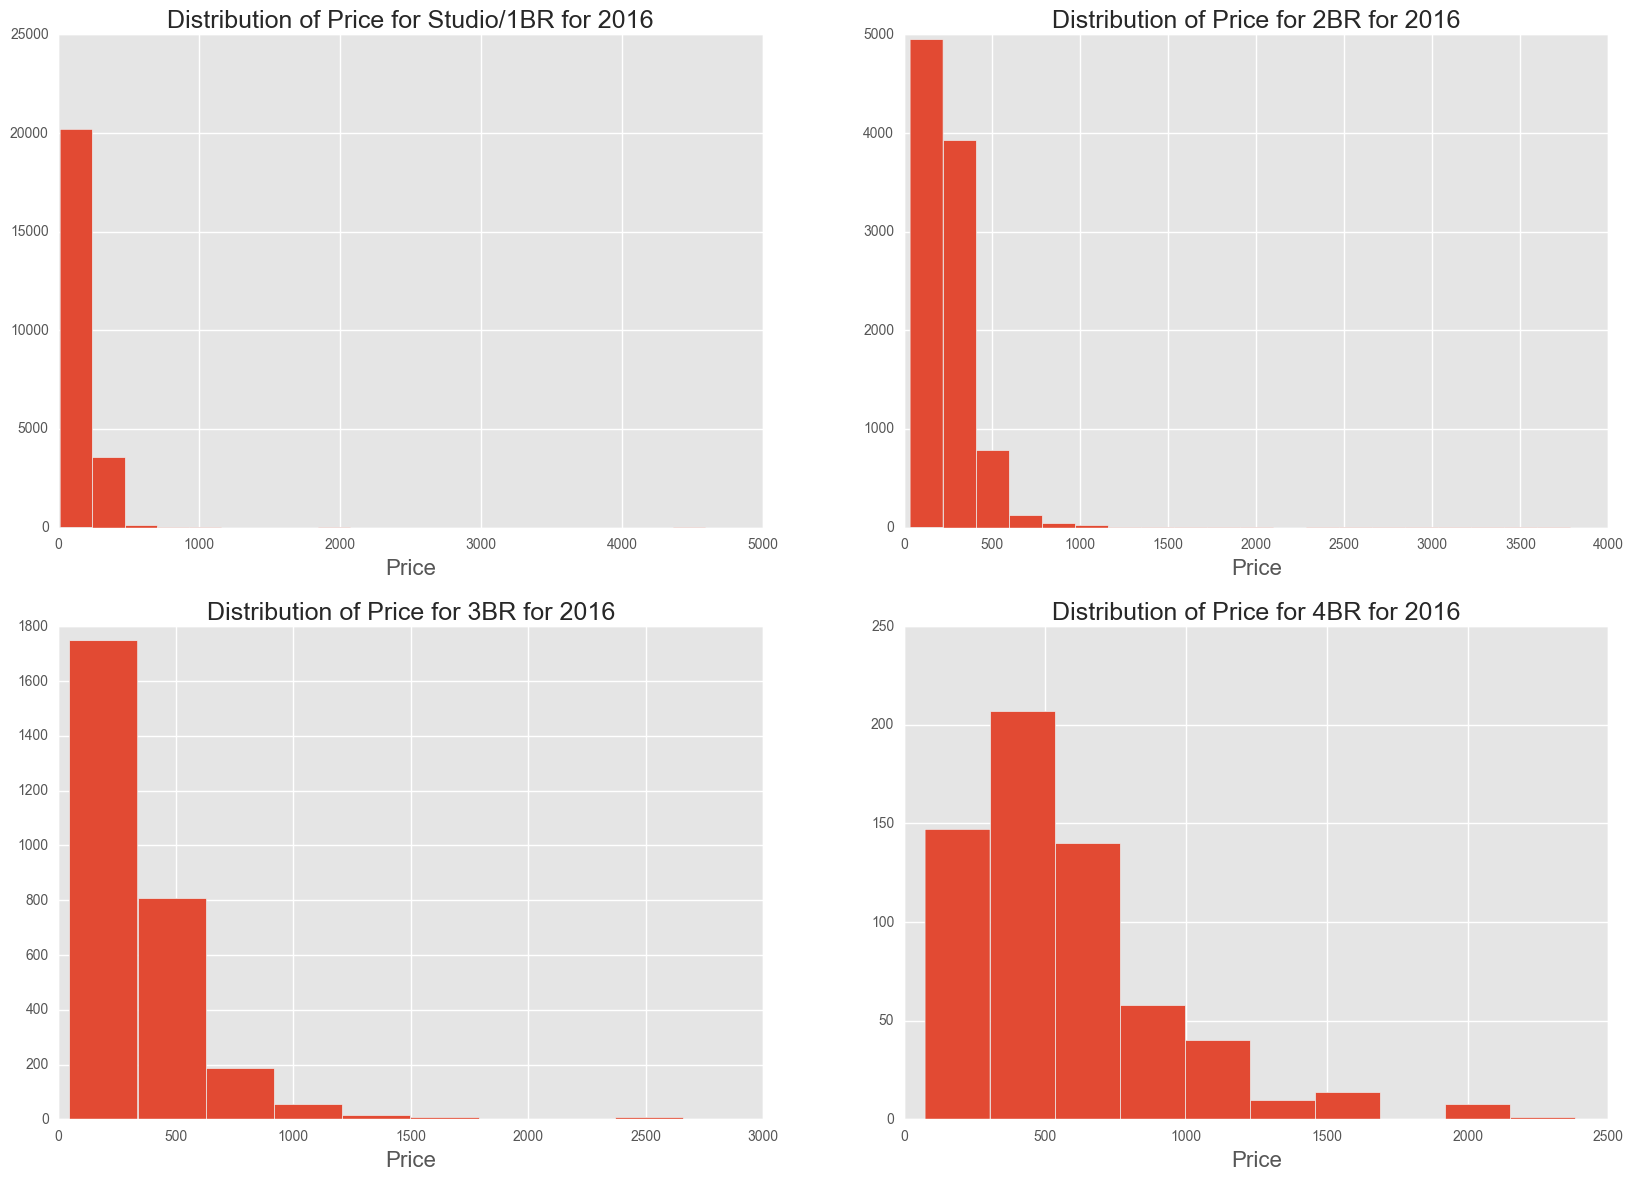

In [160]:
histograms(occ16_entire,2016)

The histograms show that each of the price distributions for the bedrooms is skewed to the right, thus the need to implement a cap on the lower and upper limit of the thresholds for price. Let's do that now. The function for price tresholds is under the function subcategory above.

In [185]:
data_2015 = price_thresholds(occ15_entire,50,350,85,600,85,800,100,1400)
data_2016 = price_thresholds(occ16_entire,50,350,85,600,85,800,100,1400)
data_2015.to_csv('data_2015'+date+'.csv')
data_2016.to_csv('data_2016'+date+'.csv')


Removing outliers, the dataframe shape is: (33207, 23)
Removing outliers, the dataframe shape is: (35375, 23)


The distributions after setting price thresholds

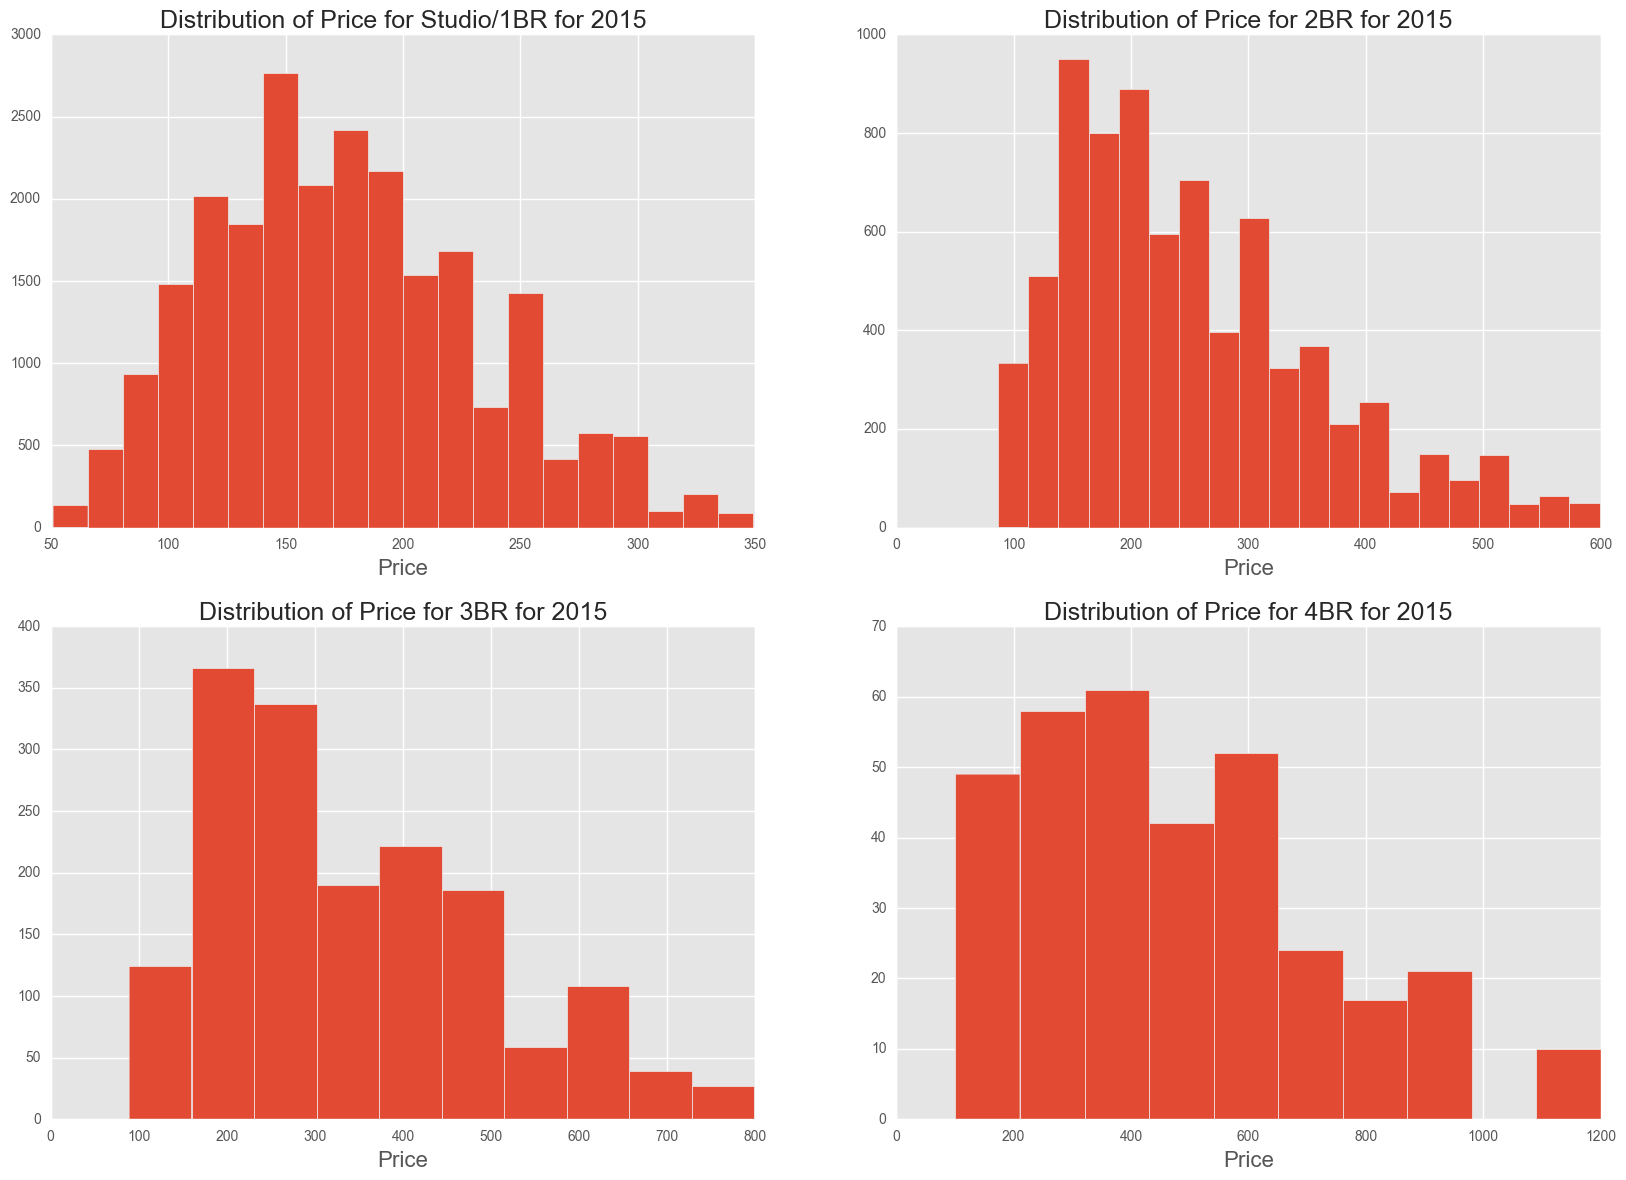

In [162]:
histograms(data_2015,2015)

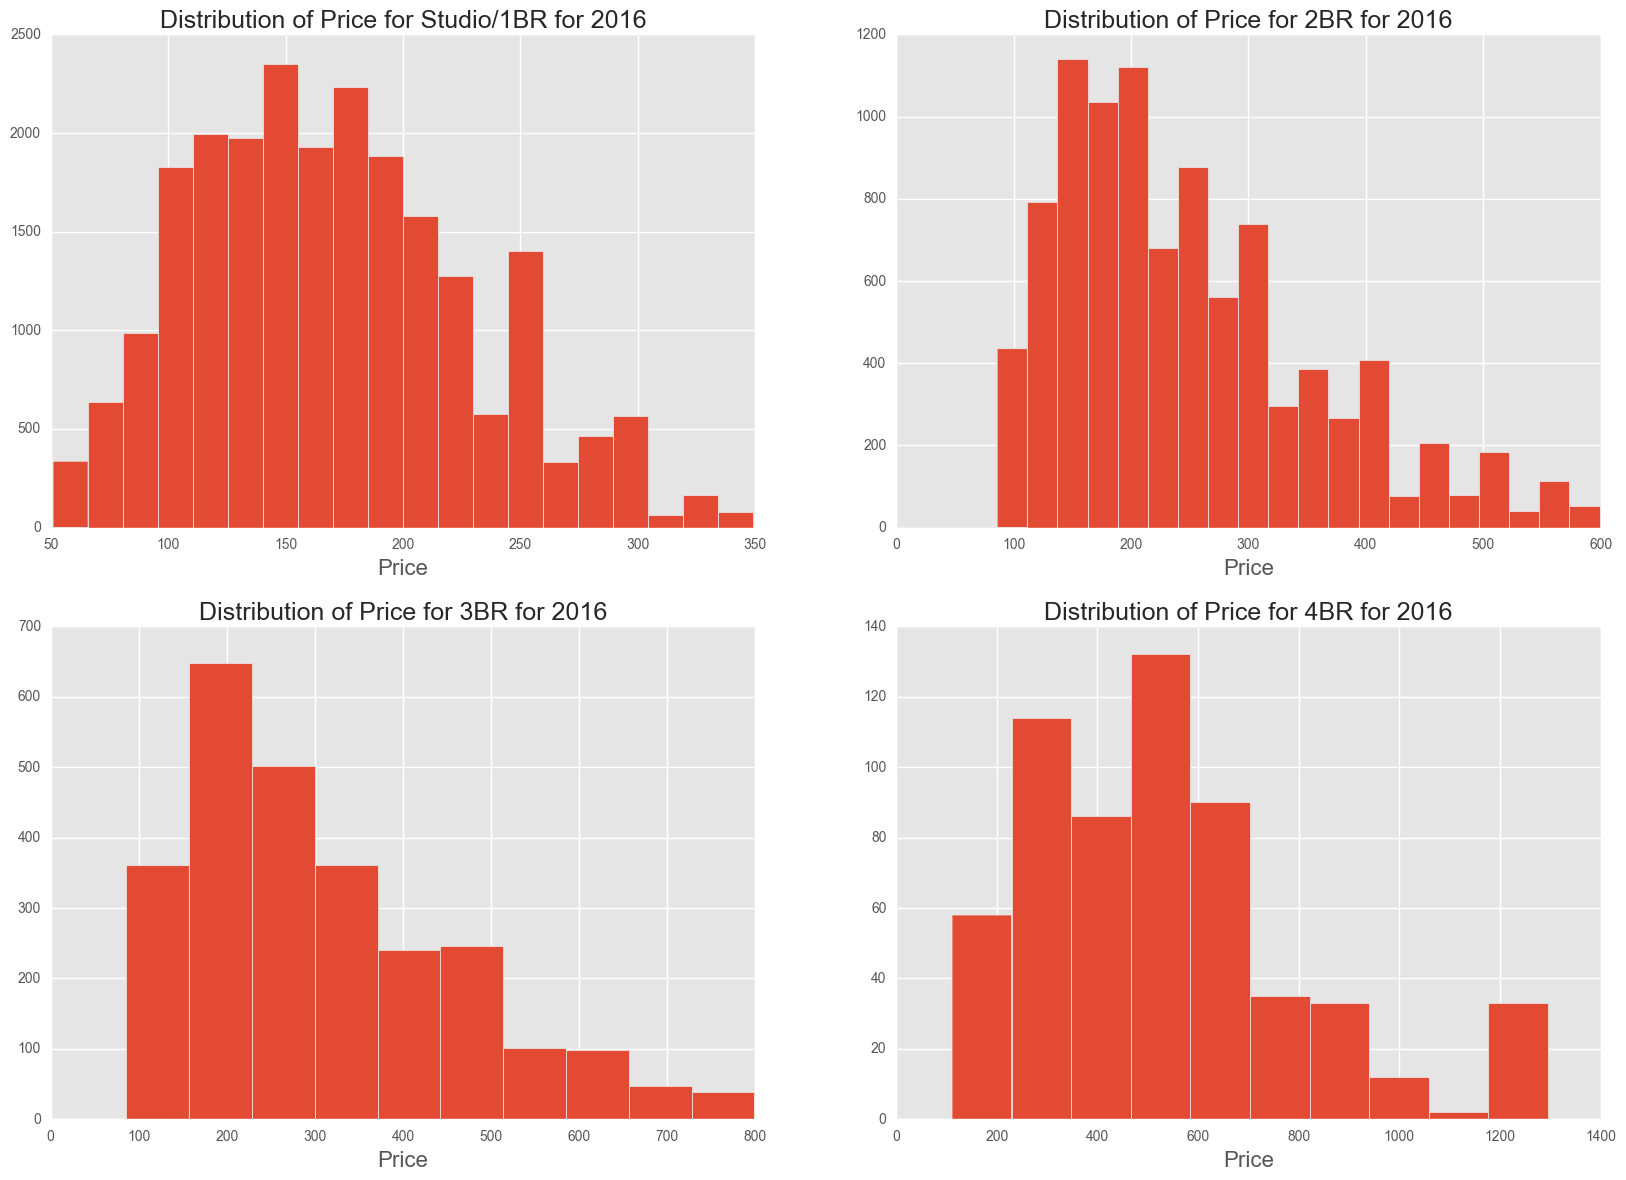

In [163]:
histograms(data_2016,2016)

As you can see, the distributions are more in line with a normal distribution as we removed the outliers for low and high prices. 

Plotting Occupancy, ADR, and RevPar by month yields the next six graphs (3 for 2015, 3 for 2016). Notice that Septemember is lower than October, which should not be the case. Also it seems on average, pricing is more flat for studio to two bedrooms. Three and Four bedrooms are more dynamic, but still not much variation. Taking a look at revpar, that is generally how pricing should be structured, lower in low demand, and higher in high demand. 

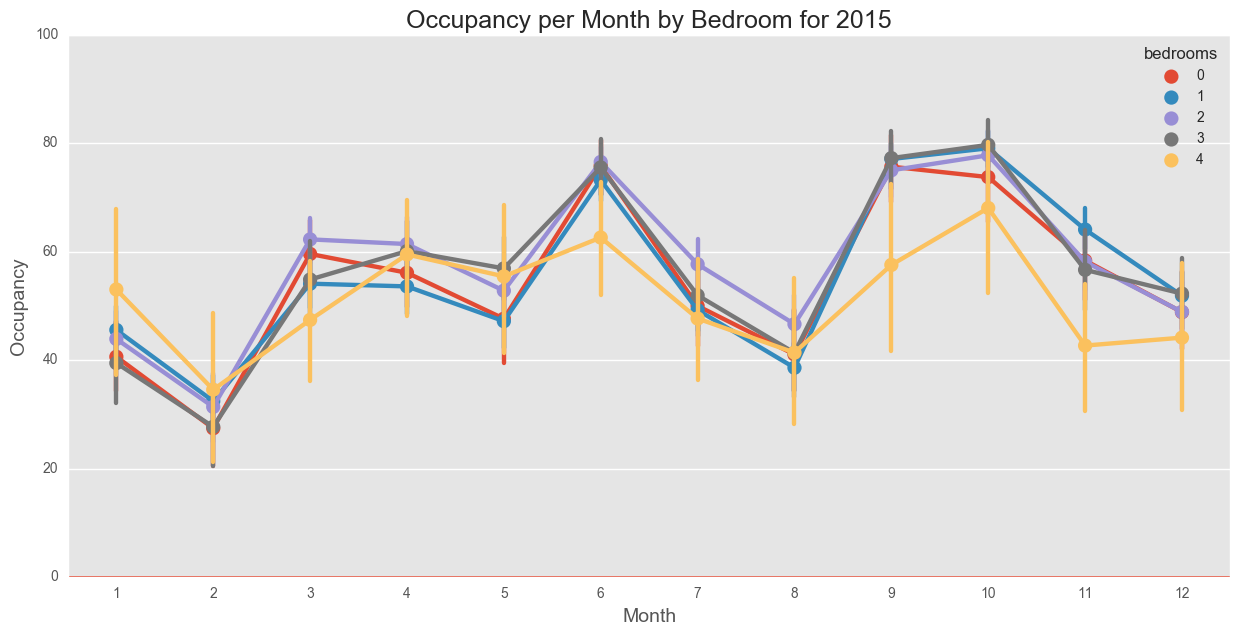

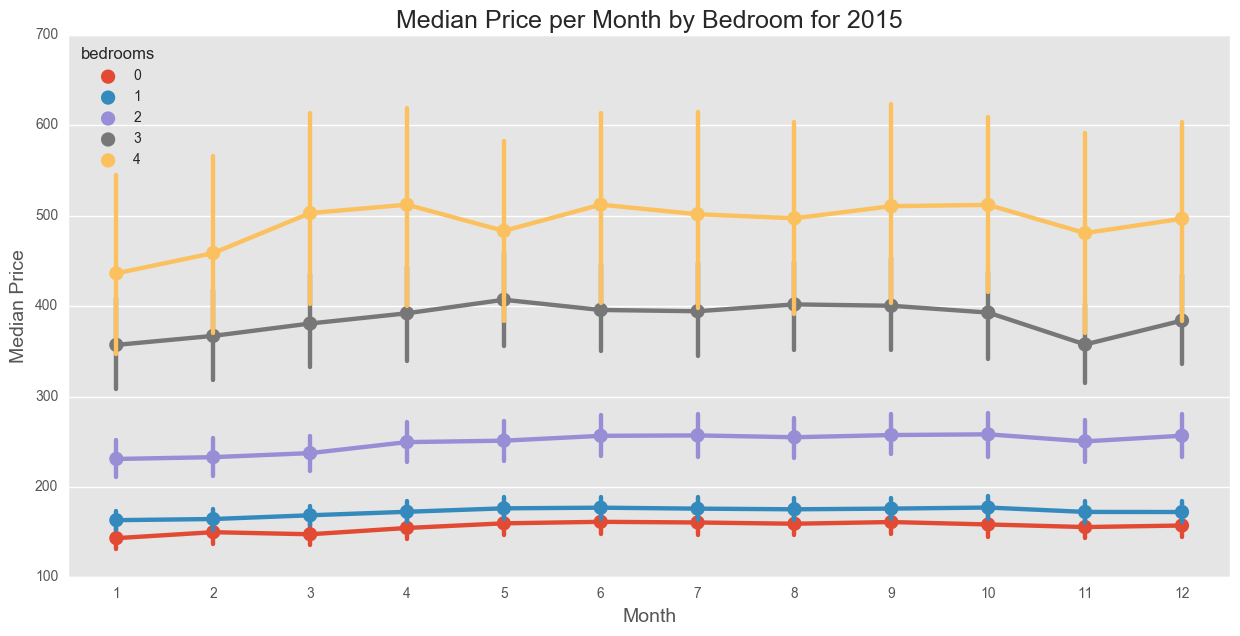

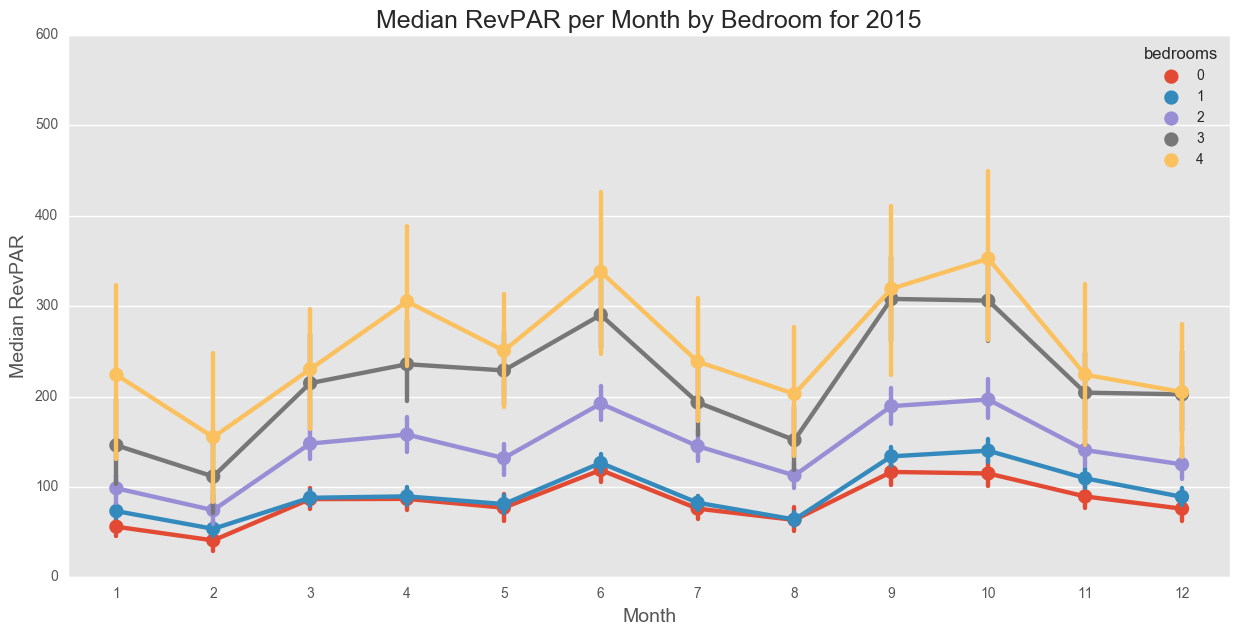

In [164]:
nhood_15 = trend_graphs(data_2015,2015)

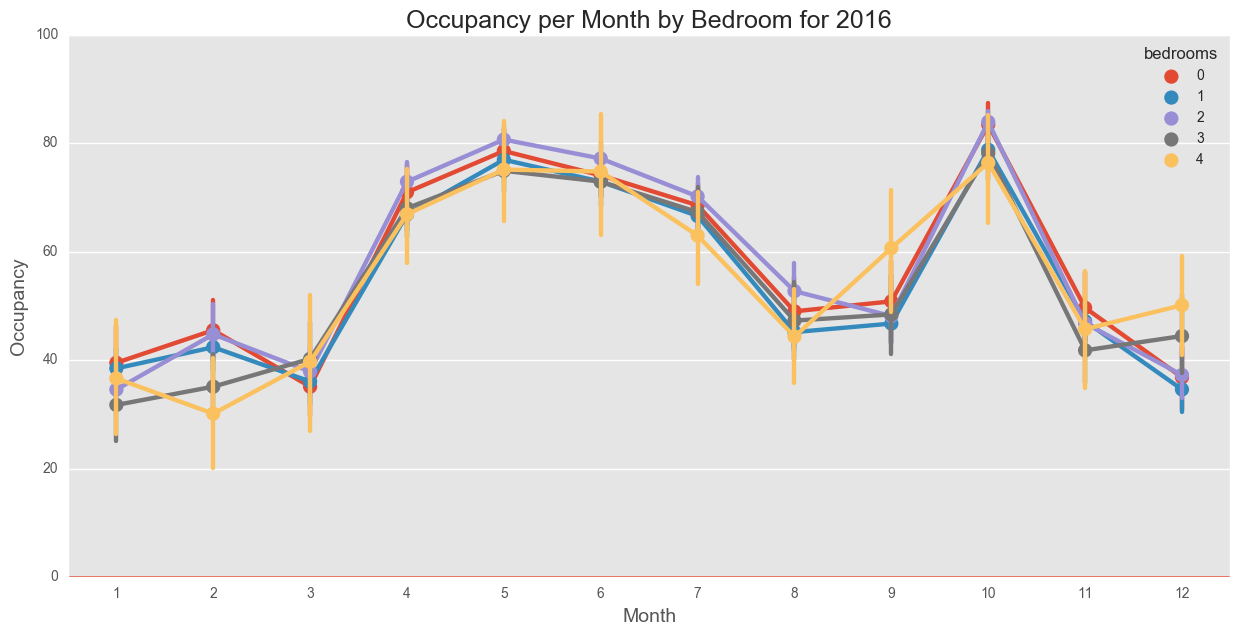

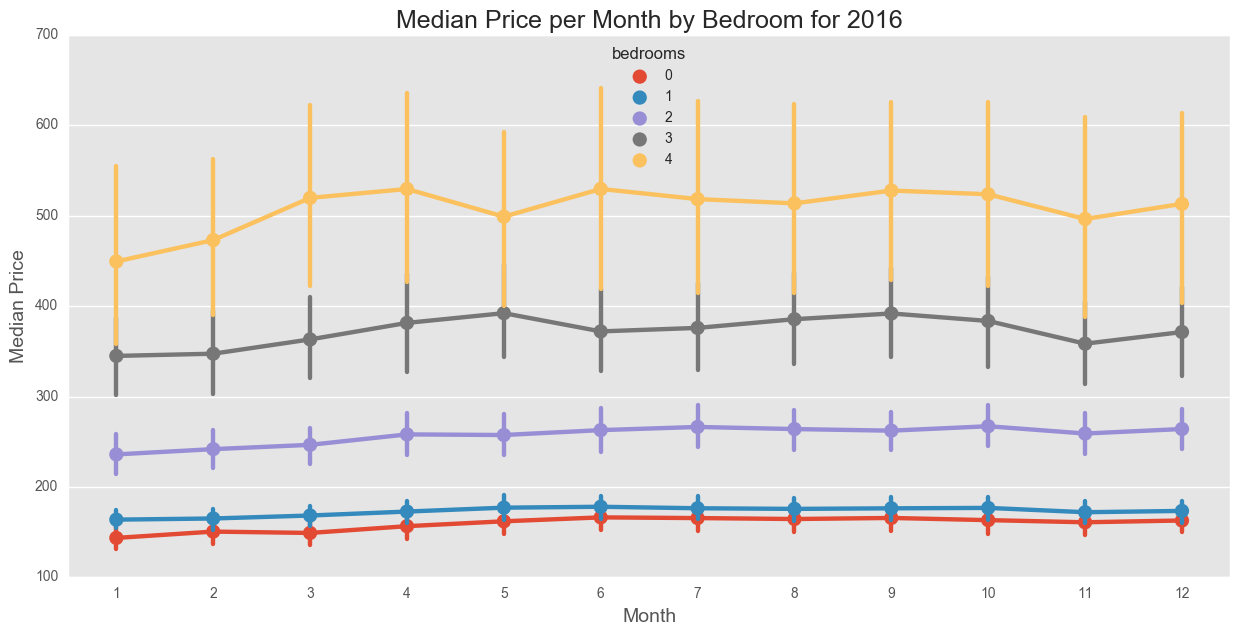

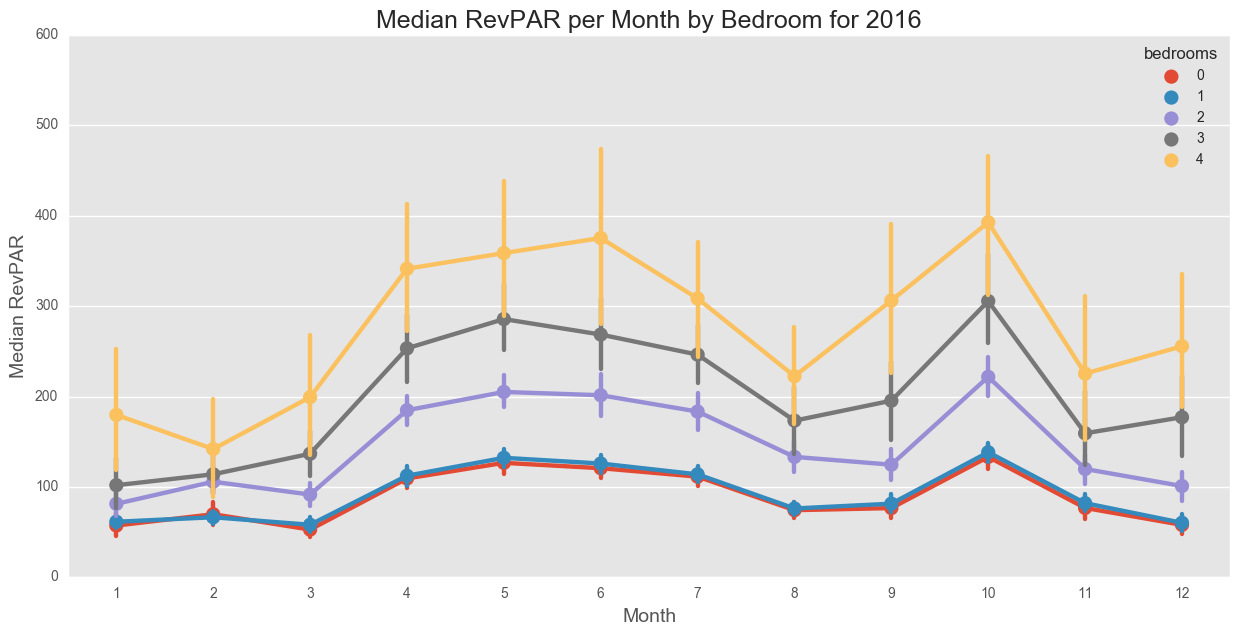

In [165]:
nhood_16 = trend_graphs(data_2016,2016)

### Model I - Predicting Prices for Private Room across Neighborhoods

#### Model Setup

In [826]:
#setting dataset for 2015, and 2015 private rooms
private_15 = data_1br15[data_1br15['room_type']=='Private room']
private_16 = data_1br16[data_1br16['room_type']=='Private room']
print 'The Private Room datframe for 2015 is:',private_15.shape
print 'The Private Room datframe for 2016 is:',private_16.shape
print private_15.columns
#setting the columns to be used
cols = ['year','month','bedrooms','number_of_reviews','review_scores_rating','neighborhood','num_comps','occ%','avg_price']
priv_15df = private_15.loc[:,cols]
priv_16df = private_16.loc[:,cols]

#are there neighborhoods in 2015 that are not in 2016 or vice versa?
neighborhood_list = []
for x in priv_15df['neighborhood'].unique():
    neighborhood_list.append(x)
print len(neighborhood_list)
for x in priv_16df['neighborhood'].unique():
    if x not in neighborhood_list:
        neighborhood_list.append(x)
    else:
        pass
len(neighborhood_list)

#looks like there are neighborhoods in one df and not in another. lets combine the dataframes and fit a label encoder
priv_total = priv_15df.append(priv_16df)
priv_total.to_csv('combined_private_room_df.csv')
priv_total['review_scores_rating'] = priv_total['review_scores_rating'].astype(int)
priv_total['avg_price'] = priv_total['avg_price'].astype(int)

#call in the label encoder
le = LabelEncoder()

#changing neighborhoods via label encoder
priv_total['neighborhood2'] = le.fit_transform(priv_total['neighborhood'])
#lets get a unique list of neighborhood and neighborhood2 (encoded) and save it to a df
neighborhood_keypair = priv_total.loc[:,['neighborhood','neighborhood2']].drop_duplicates()
neighborhood_keypair.reset_index(inplace = True,drop=True)
neighborhood_keypair.to_csv('neighborhood_keypairs.csv')
#no longer need the string version of neighborhood
del priv_total['neighborhood']
#lets rename the new neighborhood2
priv_total.rename(columns = {'neighborhood2':'neighborhood'},inplace = True)
#returning to individual years
priv15 = priv_total[priv_total['year']==2015]
priv16 = priv_total[priv_total['year']==2016]
#no longer need these columns
del priv15['year'],priv16['year'],priv15['bedrooms'],priv16['bedrooms']

#setting the y's
y15 = priv15['avg_price']
y16 = priv16['avg_price']
del priv15['avg_price'],priv16['avg_price']
#setting the X's
X15 = priv15
X16 = priv16
#correlation for 2015
X15.corr()

The Private Room datframe for 2015 is: (16319, 22)
The Private Room datframe for 2016 is: (22793, 22)
Index([u'listing_id', u'year', u'month', u'days_per_month', u'available',
       u'occupied', u'occ_yr', u'occ%', u'occ_yr%', u'avg_price',
       u'neighborhood', u'zipcode', u'bedrooms', u'bathrooms', u'room_type',
       u'number_of_reviews', u'review_scores_rating', u'price', u'area',
       u'sub_area', u'num_comps', u'revpar'],
      dtype='object')
64


,month,number_of_reviews,review_scores_rating,num_comps,occ%,neighborhood
month,1.000000,0.003249,-0.003893,0.001180,0.202340,-0.004964
number_of_reviews,0.003249,1.000000,0.050432,-0.048793,0.027001,0.034225
review_scores_rating,-0.003893,0.050432,1.000000,-0.065713,0.032528,0.046407
num_comps,0.001180,-0.048793,-0.065713,1.000000,-0.009084,0.441156
occ%,0.202340,0.027001,0.032528,-0.009084,1.000000,-0.011672
neighborhood,-0.004964,0.034225,0.046407,0.441156,-0.011672,1.000000


In [446]:
X16.corr()

,month,number_of_reviews,review_scores_rating,num_comps,occ%,neighborhood
month,1.000000,0.005290,-0.007018,0.004215,0.024688,-0.004803
number_of_reviews,0.005290,1.000000,-0.000845,-0.006072,0.035202,0.004147
review_scores_rating,-0.007018,-0.000845,1.000000,-0.007117,0.035350,0.064404
num_comps,0.004215,-0.006072,-0.007117,1.000000,0.019236,0.241509
occ%,0.024688,0.035202,0.035350,0.019236,1.000000,0.013421
neighborhood,-0.004803,0.004147,0.064404,0.241509,0.013421,1.000000


#### Modeling

Calling the Train/Test split

In [827]:
X_train,X_test,y_train,y_test = train_test_split(X15,y15,test_size = 0.33,random_state = 25)
X16_train,X16_test,y16_train,y16_test = train_test_split(X16,y16,test_size = 0.33,random_state = 25)

#### Linear Regression
Linear regression show horrible results judging by the R-squared

In [828]:
lm = LinearRegression()
lm.fit = lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)
print mean_squared_error(y_test,lm_pred)
print r2_score(y_test,lm_pred)

558.180841693
0.0794890739158


#### Extra Trees
Better results than Linear Regression, lower MSE and higher R-squared

155.294789779
0.743899216745


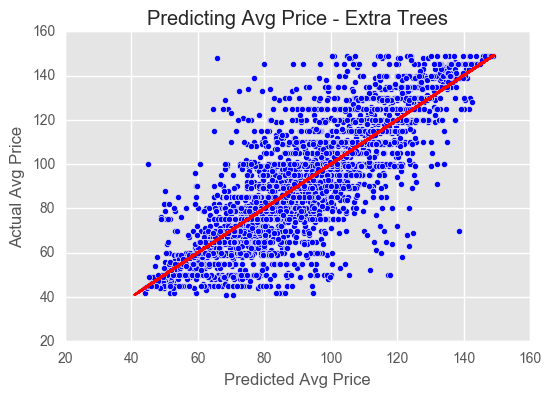

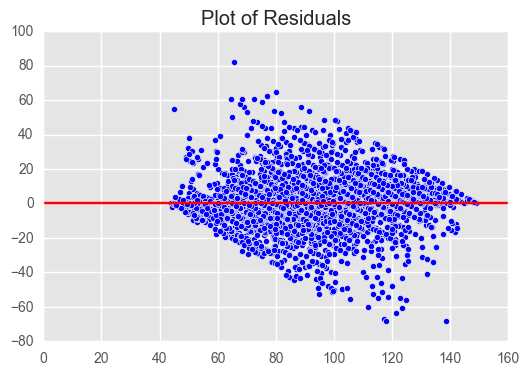

In [830]:
et = ExtraTreesRegressor(n_estimators = 100,n_jobs=-1)
et = et.fit(X_train,y_train)
et_pred = et.predict(X_test)
print mean_squared_error(y_test,et_pred)
print r2_score(y_test,et_pred)
plt.scatter(et_pred,y_test)
plt.plot(y_test,y_test,color='red')
plt.title('Predicting Avg Price - Extra Trees')
plt.xlabel('Predicted Avg Price')
plt.ylabel('Actual Avg Price')
plt.show()

plt.scatter(et_pred,y_test - et_pred)
#plt.hlines()
plt.xlim(0,160)
plt.hlines(0,0,160,color='red')
plt.title('Plot of Residuals')
plt.show();

#### Gradient Boosting
Results are better than Linear Regression, but not better than Extra Trees

In [449]:
gb = GradientBoostingRegressor(n_estimators = 1000)
gb = gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print mean_squared_error(y_test,gb_pred)
print r2_score(y_test,gb_pred)

242.825034849
0.599550753073


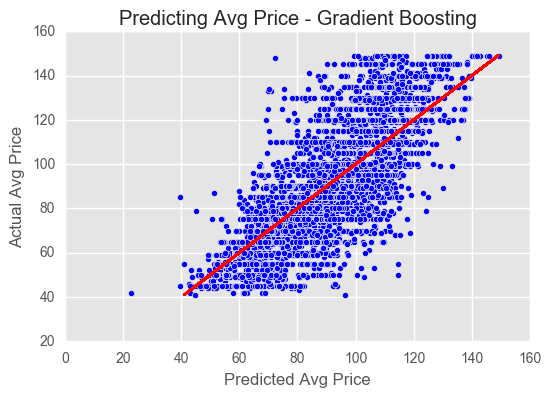

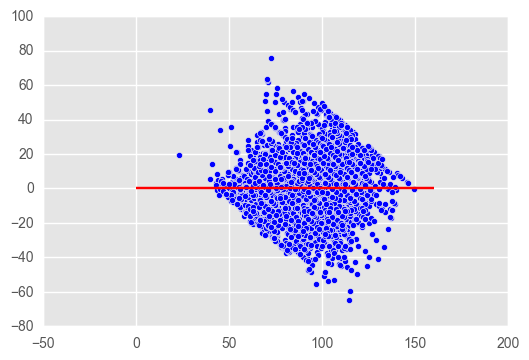

In [452]:
plt.scatter(gb_pred,y_test)
plt.plot(y_test,y_test,color='red')
plt.title('Predicting Avg Price - Gradient Boosting')
plt.xlabel('Predicted Avg Price')
plt.ylabel('Actual Avg Price')
plt.show()

plt.scatter(gb_pred,y_test - gb_pred)
plt.hlines(0,0,160,color='red')
plt.show();

In [451]:
gb_featur_imp = pd.concat([pd.Series(X15.columns,name="Features"),\
                           pd.Series(gb.feature_importances_,name="Feature Importance")],axis=1)
gb_featur_imp.sort_values('Feature Importance',ascending=False,inplace = True)
gb_featur_imp

,Features,Feature Importance
1,number_of_reviews,0.314511
5,neighborhood,0.222729
2,review_scores_rating,0.189639
3,num_comps,0.142310
4,occ%,0.088357
0,month,0.042454


#### Analyzing MSE and R2 for different limits on avg price for 2015 private rooms

In [833]:
for x in [50,60,70,80,90,100,110,120,130,140,151]:
    priv15_et = priv_total[(priv_total['avg_price']<=x) & (priv_total['year']==2015)]
    y_et = priv15_et['avg_price']
    del priv15_et['avg_price']
    del priv15_et['year'],priv15_et['bedrooms']
    X_et = priv15_et
    Xet_train,Xet_test,yet_train,yet_test = train_test_split(X_et,y_et,test_size = 0.33,random_state = 25)
    et1 = ExtraTreesRegressor(n_estimators=1000)
    et1 = et1.fit(Xet_train,yet_train)
    et1_pred = et1.predict(Xet_test)
    print "For Average Price of "+str(x)
    print "MSE",mean_squared_error(yet_test,et1_pred)
    print "R2 score",r2_score(yet_test,et1_pred)
    print "--------------------------------------"

 For Average Price of 50
MSE 2.94062761404
R2 score 0.533606030645
--------------------------------------
For Average Price of 60
MSE 12.7366912436
R2 score 0.56825306371
--------------------------------------
For Average Price of 70
MSE 20.4731363493
R2 score 0.68650600519
--------------------------------------
For Average Price of 80
MSE 42.2233109634
R2 score 0.627682151993
--------------------------------------
For Average Price of 90
MSE 57.3692632487
R2 score 0.658728883379
--------------------------------------
For Average Price of 100
MSE 83.3884158823
R2 score 0.667773305849
--------------------------------------
For Average Price of 110
MSE 96.4279071818
R2 score 0.677060391718
--------------------------------------
For Average Price of 120
MSE 118.331909897
R2 score 0.690141660518
--------------------------------------
For Average Price of 130
MSE 140.097428989
R2 score 0.698840371015
--------------------------------------
For Average Price of 140
MSE 143.514837705
R2 score 

#### How are the results when the model is applied to 2016 data?

158.394300323
0.747353744279


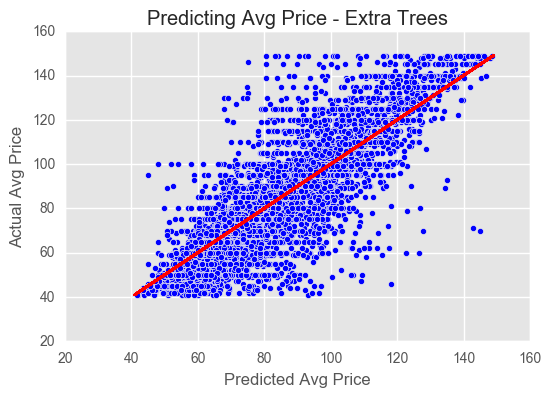

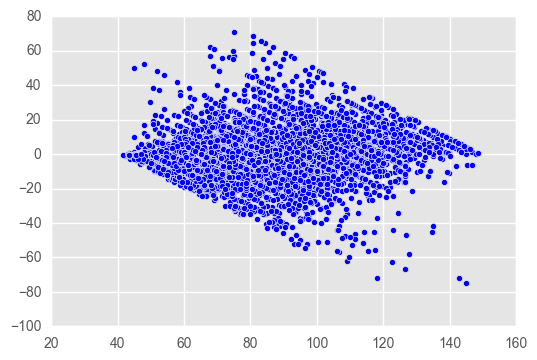

578.570439976
0.0908383489389


In [834]:
#running a new model
et2016 = ExtraTreesRegressor(n_estimators=1000)
et2016 = et2016.fit(X16_train,y16_train)
et2016_pred = et2016.predict(X16_test)
print mean_squared_error(y16_test,et2016_pred)
print r2_score(y16_test,et2016_pred)

plt.scatter(et2016_pred,y16_test)
plt.plot(y16_test,y16_test,color='red')
plt.title('Predicting Avg Price - Extra Trees')
plt.xlabel('Predicted Avg Price')
plt.ylabel('Actual Avg Price')
plt.show()

plt.scatter(et2016_pred,y16_test - et2016_pred)
#plt.hlines()
plt.show();


#applying the 2015 model to 2016 prices show a negative correlation
et2016_predict = et.predict(X16)
print mean_squared_error(y16,et2016_predict)
print r2_score(y16,et2016_predict)


#using 2016 data on the predict function for the 2015 data, resulted in a 0.09 r2 which is not great

#### Results

There are patterns in the residuals indicating that there is underfitting. There seems to be one or more features that are missing from the model. It is harder to explain the price differences among private rooms as number of bedrooms isn't a feature, since there is only one bedroom. By evaluating the feature importances, number of reviews, neighborhood, and rating are the top 3 features. If a person is looking for a room, it is very likely that he/she are looking for a credible listing, one with highest reviews, rating in the neighborhood they are wanting. Since these people are most likely traveling alone, they looking to minimize the cost of a room, thus are shopping for a Private Room and not an Entire home/Apt. Occupancy% and Month are not factors, meaning they are not pressured by seasonal factors.  Two features that are not available are photo quality and listing quality. These two are important features when deciding on a listing.

Anonther model was done on 2016 data, given that the listings csv had more columns to choose from such as whether a host is a superhost, whether the unit is instant bookable, host response rate, and host response time. The model did not perform any better, so the conclusion is that there are other features that might explain the price differences, such as listing quality, and photo quality.

When applying prices to zillow, yearly averages will be used (per neighborhood) to gauge the profitability per zillow listing. 

In [311]:
# list_2016 = pd.read_csv('/Users/amishdalal/Desktop/AirBnB-NYC/2016/listings.csv')
# #host_is_superhost,u'instant_bookable
# host_characteristics = list_2016.loc[:,['id','host_is_superhost','instant_bookable','host_response_time','host_response_rate']]
# host_characteristics['host_is_superhost'] = host_characteristics['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)
# host_characteristics['instant_bookable'] = host_characteristics['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)
# host_characteristics.rename(columns = {'id':'listing_id'},inplace = True)
# host_characteristics

# private_16
# cols2 = ['listing_id','month','bedrooms','number_of_reviews','review_scores_rating','neighborhood','num_comps','occ%','avg_price']
# priv16_test = private_16.loc[:,cols2]

# print priv16_test.shape
# priv16_test = pd.merge(priv16_test,neighborhood_keypair)
# del priv16_test['neighborhood'],priv16_test['bedrooms']
# priv16_test.rename(columns = {'neighborhood2':'neighborhood'},inplace = True)
# print priv16_test.shape
# priv16_test = pd.merge(priv16_test,host_characteristics)
# priv16_test = priv16_test[priv16_test['host_response_time'].notnull()]
# priv16_test['host_response_rate'] = priv16_test['host_response_rate'].apply(lambda x: x.replace('%','')).astype(int)
# y16t = priv16_test['avg_price']
# del priv16_test['avg_price']
# priv16_test['host_response_time'] = le.fit_transform(priv16_test['host_response_time'])

# del priv16_test['listing_id']
# X16t = priv16_test
# X16t_train,X16t_test,y16t_train,y16t_test = train_test_split(X16t,y16t,test_size = 0.33, random_state = 25)
# gb16t = GradientBoostingRegressor(n_estimators = 1000)
# gb16t = gb16t.fit(X16t_train,y16t_train)
# gb16t_pred = gb16t.predict(X16t_test)
# print "MSE",mean_squared_error(y16t_test,gb16t_pred)
# print "R2 score",r2_score(y16t_test,gb16t_pred)

### Model II - Predicting Prices for all bedrooms (entire home/apt) across Neighborhoods

In [894]:
#combining 2015 and 2015
total_data = data_2015.append(data_2016)
#transforming the neighborhds via label encoder
total_data['neighborhood'] = le.fit_transform(total_data['neighborhood'])
#using a subselect of the features. cols was defined in model 1
total_data = total_data.loc[:,cols]
#separating 2015 and 2016
data15 = total_data[total_data['year']==2015]
data16 = total_data[total_data['year']==2016]
del data15['year'],data16['year']
#setting y's
y15 = data15['avg_price']
y16 = data16['avg_price']
del data15['avg_price'], data16['avg_price']
#setting X's
X15 = data15
X16 = data16

In [895]:
#calling the train and test 
X_train,X_test,y_train,y_test = train_test_split(X15,y15,test_size=0.33,random_state=25)

#### Linear Regression

In [896]:
lm = LinearRegression()
lm.fit = lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)
print mean_squared_error(y_test,lm_pred)
print r2_score(y_test,lm_pred)

6766.33579947
0.284341473048


#### Extra Trees

1024.71097002
0.891618866535


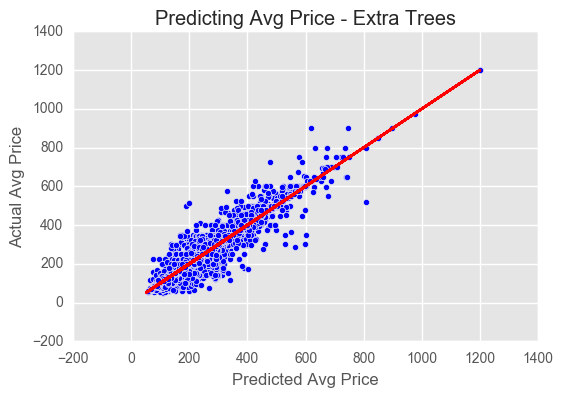

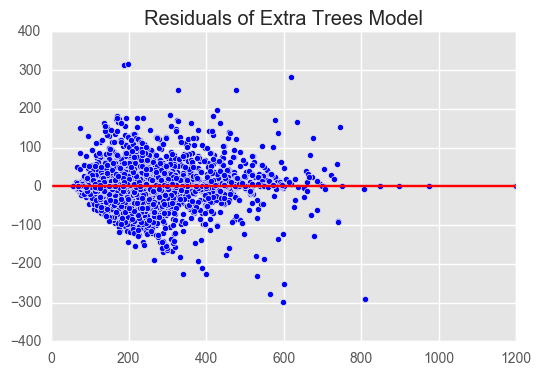

In [901]:
et = ExtraTreesRegressor(n_estimators = 100,n_jobs=-1)
et = et.fit(X_train,y_train)
et_pred = et.predict(X_test)
print mean_squared_error(y_test,et_pred)
print r2_score(y_test,et_pred)
plt.scatter(et_pred,y_test)
plt.plot(y_test,y_test,color='red')
plt.title('Predicting Avg Price - Extra Trees')
plt.xlabel('Predicted Avg Price')
plt.ylabel('Actual Avg Price')
plt.show()

plt.scatter(et_pred,y_test - et_pred)
#plt.hlines()
plt.xlim(0,1200)
plt.hlines(0,0,1200,color='red')
plt.title('Residuals of Extra Trees Model')
plt.show();


In [898]:
et_feat_imp = pd.concat([pd.Series(X16.columns,name = 'Features'),pd.Series(et.feature_importances_,name='Feature Importances')],axis=1)
et_feat_imp.sort_values('Feature Importances',ascending=False)

,Features,Feature Importances
1,bedrooms,0.291482
4,neighborhood,0.178525
2,number_of_reviews,0.146708
3,review_scores_rating,0.145105
5,num_comps,0.138028
6,occ%,0.055137
0,month,0.045016


Since occupancy% and month are not important features, the prices are indepdendent of seasonality.

How does the model predict 2016 data? MSE is quite high and the R-square is lower. This could be due to the inconsistency in scraping of the calendars, for example, Semptember is a peak month, but data shows its low because calendars were not scraped for that month.

In [900]:
et_16pred = et.predict(X16)
print mean_squared_error(y16,et_16pred)
print r2_score(y16,et_16pred)

6901.55109672
0.425330595041


#### Gradient Boosting

In [577]:
gb = GradientBoostingRegressor(n_estimators = 1000)
gb = gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print mean_squared_error(y_test,gb_pred)
print r2_score(y_test,gb_pred)


2438.64583608
0.742070488587


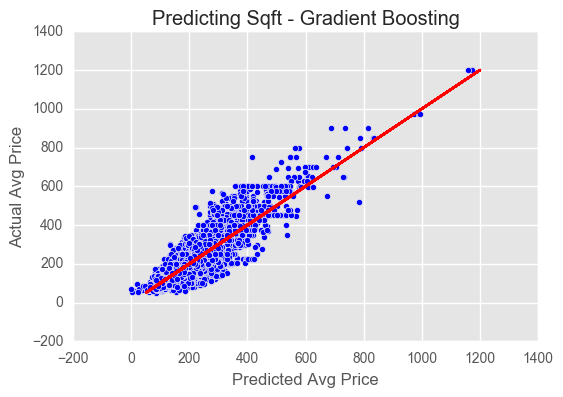

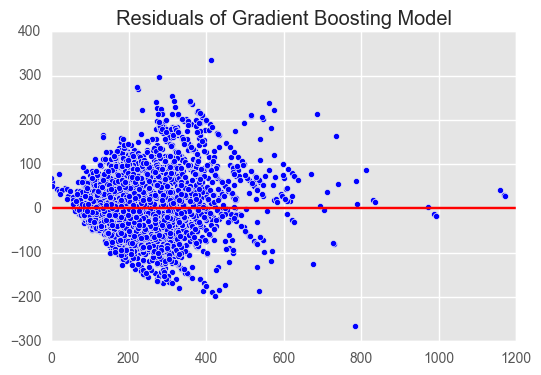

In [902]:
plt.scatter(gb_pred,y_test)
plt.plot(y_test,y_test,color='red')
plt.title('Predicting Sqft - Gradient Boosting')
plt.xlabel('Predicted Avg Price')
plt.ylabel('Actual Avg Price')
plt.show()

plt.scatter(gb_pred,y_test - gb_pred)
plt.xlim(0,1200)
plt.hlines(0,0,1200,color='red')
plt.title("Residuals of Gradient Boosting Model")
plt.show();

#### Results

Linear Regression had the highest MSE/lowest correlation, following by Gradient boosting, and then Extra Trees. Extra Trees is the preferred model given it yielded the best results. Extra Trees uses resampling of observations, and also features, so the bias is lower but the variance is higher than other Tree algorithms.  There does seem to be a trend in the residual plots meaning there is a feature that is not present in the model. This could be the photo and listing quality as previously stated, they are important features on listing decision by guests.



### Expected Profit Analysis

#### 1) Applying Private Room Avg Prices by Neighborhood and apply to Zillow two bedroom listings

#### 2) Applying Entire home/apt Average Prices by Neighborhood and Bedrooms and aply to Zillow listings

In [880]:
zillowdf['neighborhood'] = zillowdf['neighborhood'].apply(lambda x: 'Soho' if x=='SoHo' else x)
zillow2br = zillowdf[zillowdf['bedrooms']==2]
zillow2br = zillow2br.loc[:,['address','bedrooms','list_url','price','sqft','zipcode','price/sqft','neighborhood','sub_area','area']]


#combining both years
total_df = data_2015.append(data_2016)
private_df = private_15.append(private_16)

#constructing the average price groupby
avg_price = total_df.groupby(['neighborhood','bedrooms'])['avg_price'].agg([max,min,np.median,np.mean])
avg_price_private = private_df.groupby(['neighborhood','bedrooms'])['avg_price'].agg([max,min,np.median,np.mean])

avg_price.reset_index(inplace = True)
avg_price_private.reset_index(inplace = True)

#constructing occupancy groupby
yearly_occ = total_df.groupby(['neighborhood','bedrooms'])['occupied','days_per_month'].sum()
yearly_occ_private = private_df.groupby(['neighborhood','bedrooms'])['occupied','days_per_month'].sum()

yearly_occ.reset_index(inplace = True)
yearly_occ_private.reset_index(inplace = True)

yearly_occ['occ_yr%'] = (100*(yearly_occ['occupied'] / yearly_occ['days_per_month'])).round(2)
yearly_occ_private['occ_yr%'] = (100*(yearly_occ_private['occupied'] / yearly_occ_private['days_per_month'])).round(2)


metrics_yr = pd.merge(avg_price,yearly_occ.loc[:,['neighborhood','bedrooms','occ_yr%']],on=['neighborhood','bedrooms'])
metrics_yr_private = pd.merge(avg_price_private,yearly_occ_private.loc[:,['neighborhood','bedrooms','occ_yr%']],on=['neighborhood','bedrooms'])

metrics_yr['revpar'] = (metrics_yr.loc[:,['mean','median']].min(axis=1) * metrics_yr['occ_yr%']/100).round(0).astype(int)
metrics_yr_private['revpar'] = (metrics_yr_private.loc[:,['mean','median']].min(axis=1) *\
                                metrics_yr_private['occ_yr%']/100).round(0).astype(int)

metrics_yr.loc[:,['neighborhood','bedrooms','revpar']].to_csv('airbnb_files/neighborhood_revpar_entire.csv')
metrics_yr_private.loc[:,['neighborhood','revpar']].to_csv('airbnb_files/neighborhood_revpar_private.csv')

eval_df = pd.merge(zillow2br,metrics_yr_private,on='neighborhood')
eval_df['sub_area'] = eval_df['sub_area'].apply(lambda x: 'Midtown' if x is np.nan else x)



total_eval = pd.merge(zillowdf,metrics_yr,on=['neighborhood','bedrooms'])
total_eval['sub_area'] = total_eval['sub_area'].apply(lambda x: 'Midtown' if x is np.nan else x)
del eval_df['max'],eval_df['min'],total_eval['max'],total_eval['min'],total_eval['listing_num']

In [881]:
def expected_profit(df,revpar_factor=1,hourly_rate=30,kind=['private','entire']):
    '''This takes a airbnb and zillow df and calculates expected profits. Kind can be private or entire. This also
    takes into account the opportunity cost of guest managememnt.'''
    #multiplying revpar by 365 will give the expected yearly revenue (revpar = adr*occupancy), revpar = revenue per avail room
    #on average airbnb takes 3% of earnings as their fee
    df['yearly_revenue'] = (df['revpar']*365*revpar_factor*0.97).round(0).astype(int)
    #for a two bedroom, only have to look at the cost of 1 of the br. Can STR be better than long-term lease?
    if kind == 'private':
        df['yearly_cost'] = (df['price']*12/2).round(0).astype(int)
    else:
        df['yearly_cost'] = (df['price']*12).round(0).astype(int)
    df['Expected_profit'] = df['yearly_revenue'] - df['yearly_cost']
    df.sort_values('Expected_profit',ascending=False,inplace = True)
    df1 = df[df['Expected_profit']>0].copy()
    #df1.to_csv('results_'+date+".csv")
    
    
    #opportunity costs: broker fee, furniture, utilities, hours finding guests, guest management
    broker = df1['yearly_cost'] * .15/2
    
    #assume 5 hours a month
    #hourly_rate = 30
    guest_mgmt = 5*hourly_rate*12
    if kind == 'private':
        furniture = 600
        utilities =150*12
    else:
        furniture = df1['bedrooms']*1000
        utilities = 300*12
    fixed_costs = furniture + broker
    variable_costs = guest_mgmt + utilities
    total_cost = fixed_costs + variable_costs
    #df1['fixed_costs'] = fixed_costs
    #df1['variable_costs'] = variable_costs
    #df1['tot_apt_cost'] =df1['fixed_costs'] + df1['variable_costs']
    #df1['Expected_profit2'] = df1['Expected_profit'] - df1['tot_apt_cost']
    
    return df1
eval_df = expected_profit(eval_df,1,30,'private')
total_eval = expected_profit(total_eval,.7,30,'entire')

In [882]:
eval_df.head()

,address,bedrooms_x,list_url,price,sqft,zipcode,price/sqft,neighborhood,sub_area,area,bedrooms_y,median,mean,occ_yr%,revpar,yearly_revenue,yearly_cost,Expected_profit
126,"349 E 51st St # 2F, New York, NY 10022",2,http://www.zillow.com/homedetails/349-E-51st-S...,2300,580,10022,3.97,Midtown,Midtown,Manhattan,1,125.0,115.260870,56.66,65,23013,13800,9213
133,"320 E 49th St APT 37, New York, NY 10017",2,http://www.zillow.com/homedetails/320-E-49th-S...,2350,577,10017,4.07,Midtown,Midtown,Manhattan,1,125.0,115.260870,56.66,65,23013,14100,8913
97,"226 E 29th St APT 2D, New York, NY 10016",2,http://www.zillow.com/homedetails/226-E-29th-S...,2350,560,10016,4.20,Kips Bay,Midtown,Manhattan,1,115.0,110.560185,50.45,56,19827,14100,5727
18,"300 W 49th St APT 502, New York, NY 10019",2,http://www.zillow.com/homedetails/300-W-49th-S...,2600,658,10019,3.95,Hell's Kitchen,Midtown,Manhattan,1,109.0,108.727670,55.35,60,21243,15600,5643
421,"11 Allen St APT 4R, New York, NY 10002",2,http://www.zillow.com/homedetails/11-Allen-St-...,2395,561,10002,4.27,Lower East Side,Lower Manhattan,Manhattan,1,100.0,99.421344,55.72,55,19473,14370,5103


#### Finding the listings that yielded positive profit and scraping the coordinates from Zillow

In [795]:
coordinates = []
for x in eval_df[eval_df['Expected_profit']>0]['list_url']:
    coordinates.append(x)
    
for x in total_eval[total_eval['Expected_profit']>0]['list_url']:
    if x not in coordinates:
        coordinates.append(x)
with open('zillow_files/get_coordinates.json', 'w') as fp:
    json.dump(coordinates, fp)
    

In [796]:
eval_geo_df = pd.merge(eval_df,geo_df,on='list_url')
eval_geo_df[eval_geo_df['Expected_profit']>0].to_csv('model_1_geo_'+date+'.csv')


total_geo = pd.merge(total_eval,geo_df,on="list_url")
total_geo.to_csv('model_2_geo_'+date+'.csv')
total_geo

,address,baths,bedrooms,list_url,price,sqft,zipcode,price/sqft,link,neighborhood,...,sub_area,median,mean,occ_yr%,revpar,yearly_revenue,yearly_cost,Expected_profit,latitude,longitude
0,"360 E 50th St APT 2D, New York, NY 10022",1.0,3,http://www.zillow.com/homedetails/360-E-50th-S...,3195,931,10022,3.43,/homedetails/360-E-50th-St-APT-2D-New-York-NY-...,Midtown,...,Midtown,599.5,526.633333,62.72,330,81786,38340,43446,40.7538,-73.96657
1,"800 Bergen St # 4, Brooklyn, NY 11238",1.0,4,http://www.zillow.com/homedetails/800-Bergen-S...,3100,1143,11238,2.71,/homedetails/800-Bergen-St-4-Brooklyn-NY-11238...,Clinton Hill,...,Brooklyn,500.0,594.958333,59.04,295,73111,37200,35911,40.677705,-73.961418
2,"43 Columbia Pl # 1CAMRY, Brooklyn, NY 11201",1.5,3,http://www.zillow.com/homedetails/43-Columbia-...,3600,978,11201,3.68,/homedetails/43-Columbia-Pl-1CAMRY-Brooklyn-NY...,Brooklyn Heights,...,Brooklyn,600.0,448.518519,67.76,304,75342,43200,32142,40.692646,-73.998604
3,"924 Dean St # 1, Brooklyn, NY 11238",2.0,4,http://www.zillow.com/homedetails/924-Dean-St-...,3750,1279,11238,2.93,/homedetails/924-Dean-St-1-Brooklyn-NY-11238/2...,Clinton Hill,...,Brooklyn,500.0,594.958333,59.04,295,73111,45000,28111,40.678154,-73.959444
4,"842 Classon Ave APT 8, Brooklyn, NY 11238",1.0,4,http://www.zillow.com/homedetails/842-Classon-...,3800,1278,11238,2.97,"/b/842-Classon-Ave-Brooklyn-NY/40.672099,-73.9...",Clinton Hill,...,Brooklyn,500.0,594.958333,59.04,295,73111,45600,27511,40.672099,-73.961392
5,"70 W 109th St APT 54, New York, NY 10025",1.0,3,http://www.zillow.com/homedetails/70-W-109th-S...,2700,813,10025,3.32,"/b/70-W-109th-St-New-York-NY/40.800759,-73.961...",Upper West Side,...,Upper Manhattan,495.0,488.508197,47.87,234,57993,32400,25593,40.800759,-73.961066
6,"301 E 47th St # 15X, New York, NY 10017",1.0,3,http://www.zillow.com/homedetails/301-E-47th-S...,4770,926,10017,5.15,/homedetails/301-E-47th-St-15X-New-York-NY-100...,Midtown,...,Midtown,599.5,526.633333,62.72,330,81786,57240,24546,40.752954,-73.969514
7,"301 E 47th St # 15X, New York, NY 10017",1.0,3,http://www.zillow.com/homedetails/301-E-47th-S...,4770,926,10017,5.15,/homedetails/301-E-47th-St-15X-New-York-NY-100...,Midtown,...,Midtown,599.5,526.633333,62.72,330,81786,57240,24546,40.752954,-73.969514
8,"301 E 47th St # 15X, New York, NY 10017",1.0,3,http://www.zillow.com/homedetails/301-E-47th-S...,4770,926,10017,5.15,/homedetails/301-E-47th-St-15X-New-York-NY-100...,Midtown,...,Midtown,599.5,526.633333,62.72,330,81786,57240,24546,40.752954,-73.969514
9,"301 E 47th St # 15X, New York, NY 10017",1.0,3,http://www.zillow.com/homedetails/301-E-47th-S...,4770,926,10017,5.15,/homedetails/301-E-47th-St-15X-New-York-NY-100...,Midtown,...,Midtown,599.5,526.633333,62.72,330,81786,57240,24546,40.752954,-73.969514


## Conclusions
For model 1, results yielded that Midtown offers the best places to find a two bedroom units and place one on STR platform. This is most likely due to the lower price/sqft than lower Manhattan, yet a place where tourists want to be (near Times Square). A lot of locals do not want to live in the Times Square area, but has a high concentration of hotels/tourists, which makes a great location to maximize the return of the extra room versus finding a long-term tenant.

For model 2. midtown again ranks very highly, as well as Clinton Hill, which is in Brookly, but very close to Manhattan. Overall analysis yields that the best units are units that maximize RevPAR for that unit over rent per day.

Using Extra Trees, the MSE for both the models yielded the lowest when compared to Linear Regression and Gradient Boosting. Applying these to new units should give a rough estimation of the expected profits.

#### Future Considerations

Getting calendar data that is scraped regularly, especially if it includes peak months, would yield better occupancy levels. Also this would result in more efficient price computation. Tidying up the Zillow scrape to where it scrapes coordinates and doorman (would be used as a proxy for more luxurious apartments) would be the next phase after this analysis.

It would be useful to download future airbnb calendar scrapes to give a better average price per month, which should give better results for expected profits.


## Extra Visualizations!

In [824]:
total_datadf = data_2015.append(data_2016)
total_datadf.columns


Index([u'listing_id', u'year', u'month', u'days_per_month', u'available',
       u'occupied', u'occ_yr', u'occ%', u'occ_yr%', u'avg_price',
       u'neighborhood', u'zipcode', u'bedrooms', u'bathrooms', u'room_type',
       u'number_of_reviews', u'review_scores_rating', u'price', u'area',
       u'sub_area', u'num_comps', u'num_comp', u'revpar'],
      dtype='object')

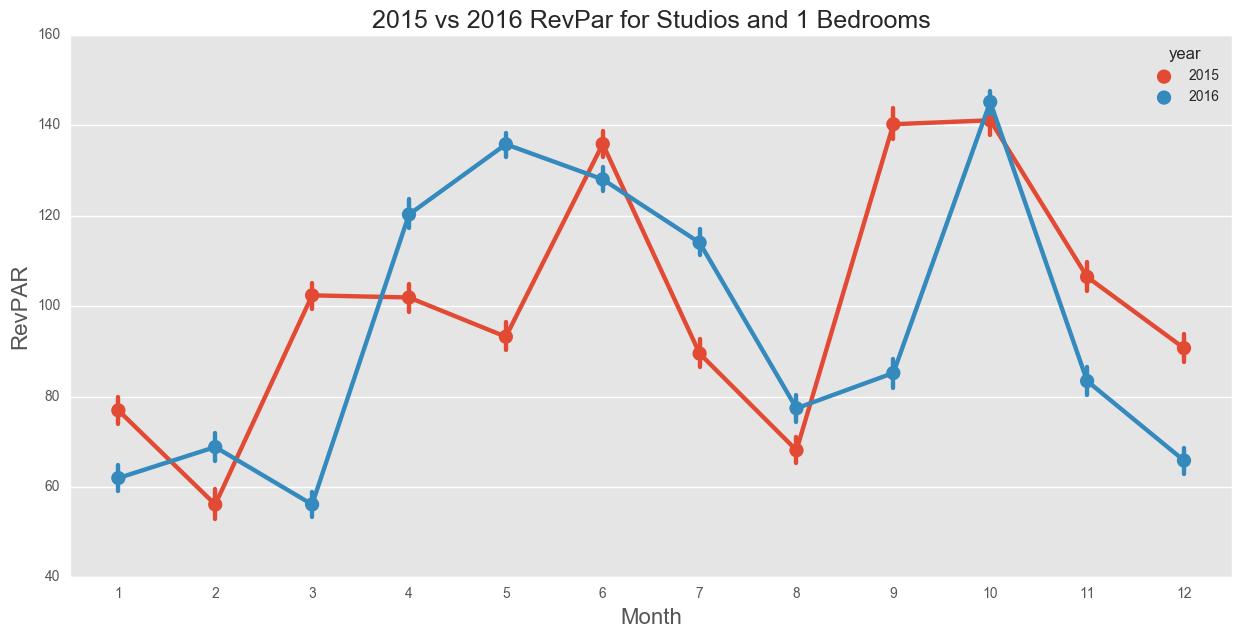

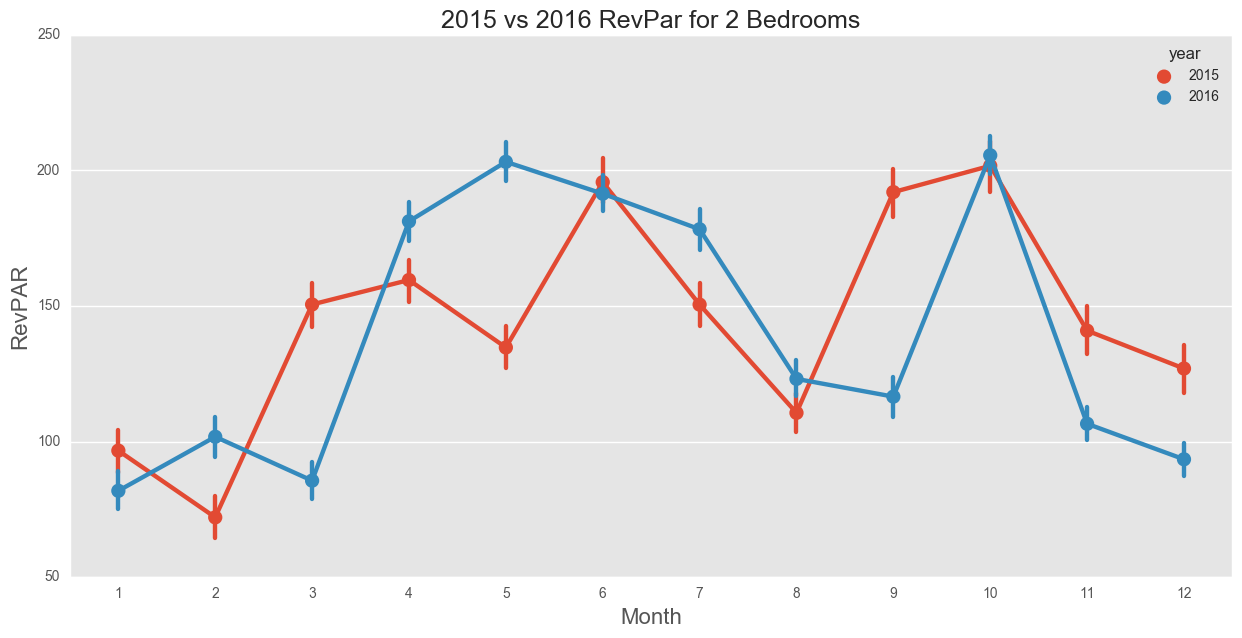

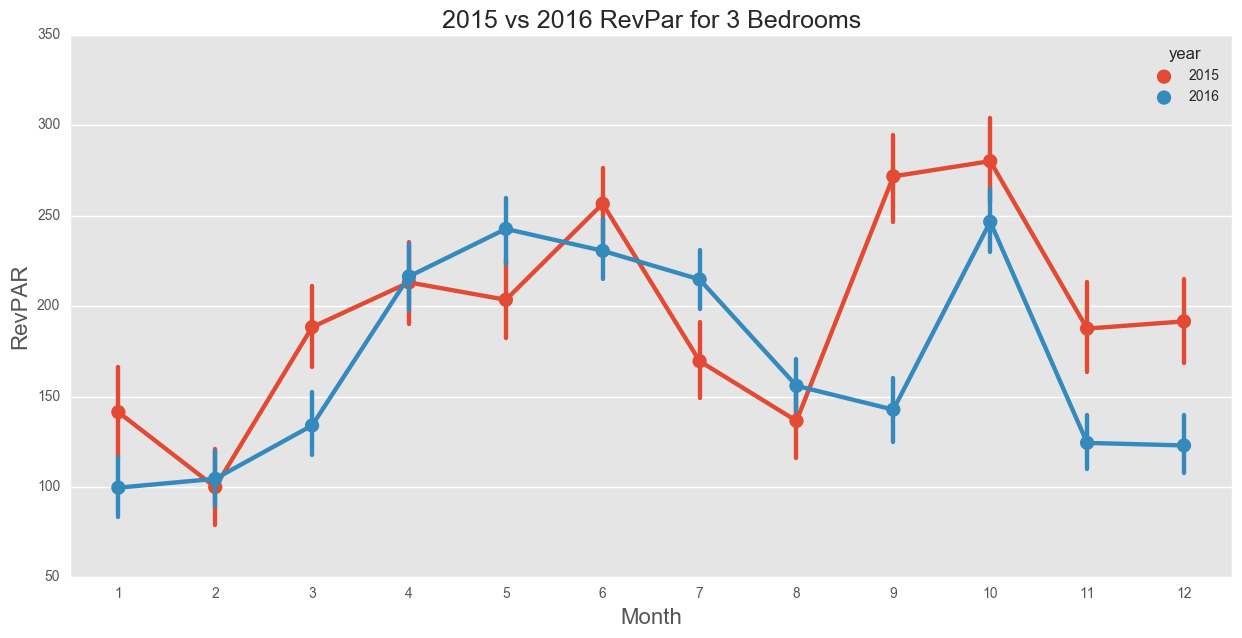

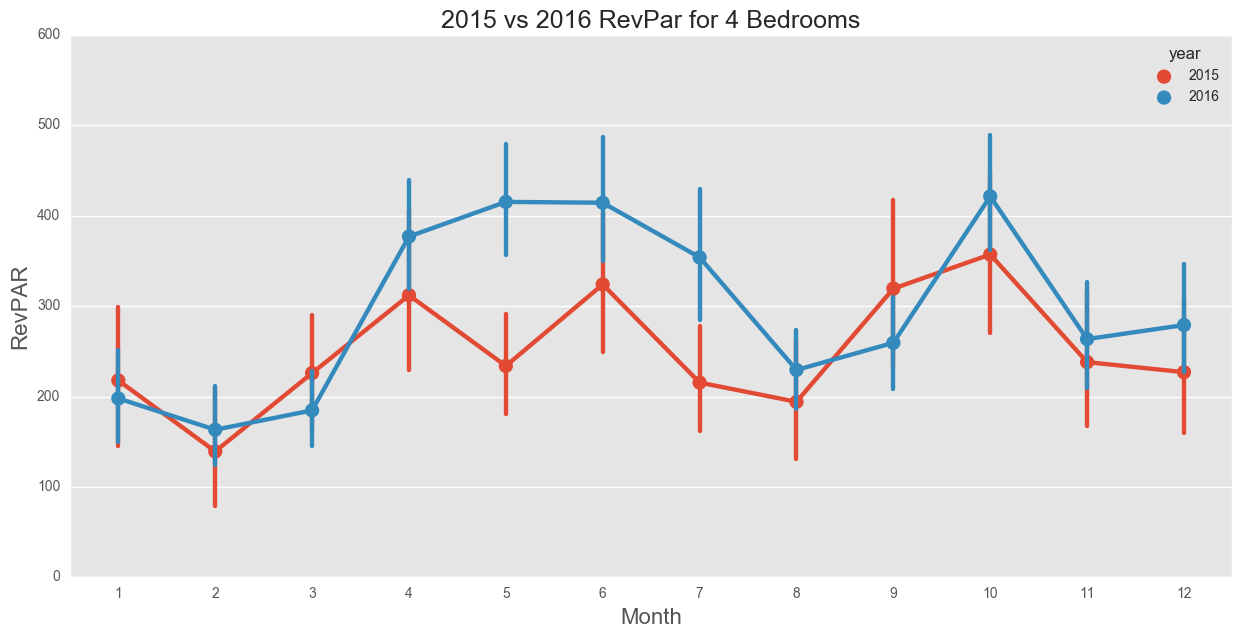

In [819]:
total_entire = total_datadf[total_datadf['room_type']!='Private Room'].copy()
plt.subplots(figsize=(15,7))
sns.pointplot(data= total_entire[(total_entire['bedrooms']==0)|(total_entire['bedrooms']==1)],x='month',y='revpar',hue='year')
plt.title('2015 vs 2016 RevPar for Studios and 1 Bedrooms',fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('RevPAR',fontsize=16)
plt.show()
#two bedrooms
plt.subplots(figsize=(15,7))
sns.pointplot(data= total_entire[(total_entire['bedrooms']==2)],x='month',y='revpar',hue='year')
plt.title('2015 vs 2016 RevPar for 2 Bedrooms',fontsize=18)
plt.ylabel('RevPAR',fontsize=16)

plt.xlabel('Month',fontsize=16)

plt.show()
#three bedrooms
plt.subplots(figsize=(15,7))

sns.pointplot(data= total_entire[(total_entire['bedrooms']==3)],x='month',y='revpar',hue='year')
plt.title('2015 vs 2016 RevPar for 3 Bedrooms',fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('RevPAR',fontsize=16)

plt.show()

#four bedrooms
plt.subplots(figsize=(15,7))

sns.pointplot(data= total_entire[(total_entire['bedrooms']==4)],x='month',y='revpar',hue='year')
plt.title('2015 vs 2016 RevPar for 4 Bedrooms',fontsize=18)
plt.xlabel('Month',fontsize=16)
plt.ylabel('RevPAR',fontsize=16)

plt.show()




This shows the seasonality year over year. Issue with the data is that September 2016 was not scraped, and it being
a peak month poses a problem. May 2015 was the same issue.